# DENGUE CASES PREDICTION USING MACHINE LEARNING

### IMPORTING LIBRARIES

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)

### READING THE DATASETS

In [22]:
feature_dataset = pd.read_csv("dengue_features_train.csv")
print("Shape:",feature_dataset.shape)
feature_dataset.head()

Shape: (1456, 24)


city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0  0.177617                 12.42             297.572857   
1  0.155486                 22.82             298.211429   
2  0.170843                 34.54             298.781429   
3  0.235886                 15.36             298.987143   
4  0.247340                  7.52             299.518571   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0             297.742857                   292.414286   
1             298.442857                   293.951429   
2             298.878571                   295.434286   
3             299.228571                   295.310000   
4             299.664286                   295.821429   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      299.8                      295.9   
1                      300.9                      296.4   
2                      300.5                      297.3   
3                      301.4                      297.0   
4                      301.9                      297.5   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  
3                33.3                23.3                4.0  
4                35.0                23.9                5.8

In [23]:
label_dataset = pd.read_csv("dengue_labels_train.csv")
print("Shape:",label_dataset.shape)
label_dataset.head()

Shape: (1456, 4)


city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6

In [141]:
testing_dataset = pd.read_csv("dengue_features_test.csv")
print("Shape:",testing_dataset.shape)
testing_dataset.head()

Shape: (416, 24)


city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  2008          18      2008-04-29  -0.0189 -0.018900  0.102729   
1   sj  2008          19      2008-05-06  -0.0180 -0.012400  0.082043   
2   sj  2008          20      2008-05-13  -0.0015       NaN  0.151083   
3   sj  2008          21      2008-05-20      NaN -0.019867  0.124329   
4   sj  2008          22      2008-05-27   0.0568  0.039833  0.062267   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0  0.091200                 78.60             298.492857   
1  0.072314                 12.56             298.475714   
2  0.091529                  3.66             299.455714   
3  0.125686                  0.00             299.690000   
4  0.075914                  0.76             299.780000   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0             298.550000                   294.527143   
1             298.557143                   294.395714   
2             299.357143                   295.308571   
3             299.728571                   294.402857   
4             299.671429                   294.760000   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      301.1                      296.4   
1                      300.8                      296.7   
2                      302.2                      296.4   
3                      303.0                      296.9   
4                      302.3                      297.3   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            25.37                             78.781429   
1                            21.83                             78.230000   
2                             4.12                             78.270000   
3                             2.20                             73.015714   
4                             4.36                             74.084286   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         78.60                              15.918571   
1                         12.56                              15.791429   
2                          3.66                              16.674286   
3                          0.00                              15.775714   
4                          0.76                              16.137143   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           3.128571           26.528571                 7.057143   
1           2.571429           26.071429                 5.557143   
2           4.428571           27.928571                 7.785714   
3           4.342857           28.057143                 6.271429   
4           3.542857           27.614286                 7.085714   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                33.3                21.7               75.2  
1                30.0                22.2               34.3  
2                32.8                22.8                3.0  
3                33.3                24.4                0.3  
4                33.3                23.3               84.1

In [25]:
# MERGING BOTH THE DATASETS BASED 'city', 'year', 'weekofyear' COLUMNS TO FETCH INDEPENDENT AND TARGET VARIABLES TOGETHER
training_dataset = pd.merge(feature_dataset, label_dataset, on=['city', 'year', 'weekofyear'])

In [26]:
print("Shape:",training_dataset.shape)
training_dataset.head()

Shape: (1456, 25)


city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0  0.177617                 12.42             297.572857   
1  0.155486                 22.82             298.211429   
2  0.170843                 34.54             298.781429   
3  0.235886                 15.36             298.987143   
4  0.247340                  7.52             299.518571   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0             297.742857                   292.414286   
1             298.442857                   293.951429   
2             298.878571                   295.434286   
3             299.228571                   295.310000   
4             299.664286                   295.821429   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      299.8                      295.9   
1                      300.9                      296.4   
2                      300.5                      297.3   
3                      301.4                      297.0   
4                      301.9                      297.5   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  total_cases  
0                29.4                20.0               16.0            4  
1                31.7                22.2                8.6            5  
2                32.2                22.8               41.4            4  
3                33.3                23.3                4.0            3  
4                35.0                23.9                5.8            6

----------------

### EXPLORATORY DATA ANALYSIS

#### 1. DATA EXPLORATION

In [27]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [28]:
training_dataset.describe()

year   weekofyear      ndvi_ne      ndvi_nw      ndvi_se  \
count  1456.000000  1456.000000  1262.000000  1404.000000  1434.000000   
mean   2001.031593    26.503434     0.142294     0.130553     0.203783   
std       5.408314    15.019437     0.140531     0.119999     0.073860   
min    1990.000000     1.000000    -0.406250    -0.456100    -0.015533   
25%    1997.000000    13.750000     0.044950     0.049217     0.155087   
50%    2002.000000    26.500000     0.128817     0.121429     0.196050   
75%    2005.000000    39.250000     0.248483     0.216600     0.248846   
max    2010.000000    53.000000     0.508357     0.454429     0.538314   

           ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
count  1434.000000           1443.000000            1446.000000   
mean      0.202305             45.760388             298.701852   
std       0.083903             43.715537               1.362420   
min      -0.063457              0.000000             294.635714   
25%       0.144209              9.800000             297.658929   
50%       0.189450             38.340000             298.646429   
75%       0.246982             70.235000             299.833571   
max       0.546017            390.600000             302.200000   

       reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
count            1446.000000                  1446.000000   
mean              299.225578                   295.246356   
std                 1.261715                     1.527810   
min               294.892857                   289.642857   
25%               298.257143                   294.118929   
50%               299.289286                   295.640714   
75%               300.207143                   296.460000   
max               302.928571                   298.450000   

       reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
count                1446.000000                1446.000000   
mean                  303.427109                 295.719156   
std                     3.234601                   2.565364   
min                   297.800000                 286.900000   
25%                   301.000000                 293.900000   
50%                   302.400000                 296.200000   
75%                   305.500000                 297.900000   
max                   314.000000                 299.900000   

       reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
count                      1446.000000                           1446.000000   
mean                         40.151819                             82.161959   
std                          43.434399                              7.153897   
min                           0.000000                             57.787143   
25%                          13.055000                             77.177143   
50%                          27.245000                             80.301429   
75%                          52.200000                             86.357857   
max                         570.500000                             98.610000   

       reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
count                   1443.000000                            1446.000000   
mean                      45.760388                              16.746427   
std                       43.715537                               1.542494   
min                        0.000000                              11.715714   
25%                        9.800000                              15.557143   
50%                       38.340000                              17.087143   
75%                       70.235000                              17.978214   
max                      390.600000                              20.461429   

       reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
count        1446.000000         1413.000000              1413.000000   
mean            4.903754           27.185783           

#### OBSERVATIONS:
1. We could observe that there are multiple missing values across various features.
2. week_start_date is present as an Object Datatype, hence we might need to convert it to datetime datatype for further analysis.
3. Variables like temperature and humidity show moderate variability, while Precipitation amounts vary widely, while vegetation indices are relatively stable.
4. The distributions of features appear to be skewed, with means, medians, and quartiles differing significantly, suggesting potential outliers or non-normality.

In [29]:
## CONVERTING 'week_start_date' into DATETIME 
training_dataset['week_start_date'] = pd.to_datetime(training_dataset['week_start_date'])

In [30]:
# Converting "week_start_date" column to string type
training_dataset["week_start_date"] = training_dataset["week_start_date"].astype(str)


training_dataset[["start_year", "start_month", "start_date"]] = training_dataset["week_start_date"].str.split("-", n=2, expand=True)

In [31]:
# Converting columns to integer type
training_dataset["start_year"] = training_dataset["start_year"].astype(int)
training_dataset["start_month"] = training_dataset["start_month"].astype(int)
training_dataset["start_date"] = training_dataset["start_date"].astype(int)

In [142]:
## CONVERTING 'week_start_date' into DATETIME 
testing_dataset['week_start_date'] = pd.to_datetime(testing_dataset['week_start_date'])

In [143]:
# Converting "week_start_date" column to string type
testing_dataset["week_start_date"] = testing_dataset["week_start_date"].astype(str)

testing_dataset[["start_year", "start_month", "start_date"]] = testing_dataset["week_start_date"].str.split("-", n=2, expand=True)

In [144]:
testing_dataset["start_year"] = testing_dataset["start_year"].astype(int)
testing_dataset["start_month"] = testing_dataset["start_month"].astype(int)
testing_dataset["start_date"] = testing_dataset["start_date"].astype(int)

#### 2. MISSING VALUES

In [35]:
features_with_na = [feature for feature in training_dataset.columns if training_dataset[feature].isnull().sum()>=1]

for feature in features_with_na:
    print(f"{feature} : {training_dataset[feature].isnull().sum()} missing values")

ndvi_ne : 194 missing values
ndvi_nw : 52 missing values
ndvi_se : 22 missing values
ndvi_sw : 22 missing values
precipitation_amt_mm : 13 missing values
reanalysis_air_temp_k : 10 missing values
reanalysis_avg_temp_k : 10 missing values
reanalysis_dew_point_temp_k : 10 missing values
reanalysis_max_air_temp_k : 10 missing values
reanalysis_min_air_temp_k : 10 missing values
reanalysis_precip_amt_kg_per_m2 : 10 missing values
reanalysis_relative_humidity_percent : 10 missing values
reanalysis_sat_precip_amt_mm : 13 missing values
reanalysis_specific_humidity_g_per_kg : 10 missing values
reanalysis_tdtr_k : 10 missing values
station_avg_temp_c : 43 missing values
station_diur_temp_rng_c : 43 missing values
station_max_temp_c : 20 missing values
station_min_temp_c : 14 missing values
station_precip_mm : 22 missing values


##### SINCE THERE ARE MANY MISSING VALUES , WE NEED TO FIND RELATIONSHIP BETWEEN MISSING VALUES AND TOTAL CASES.

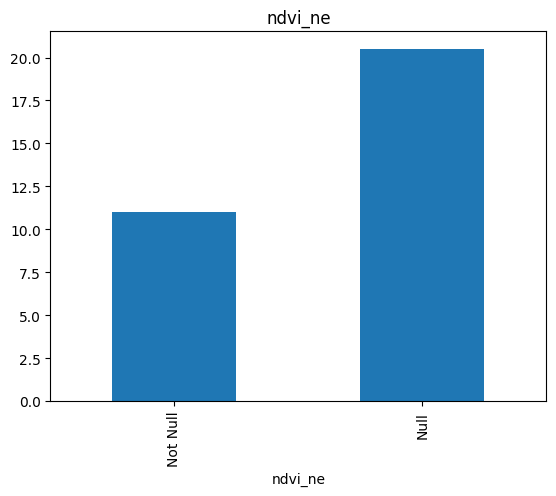

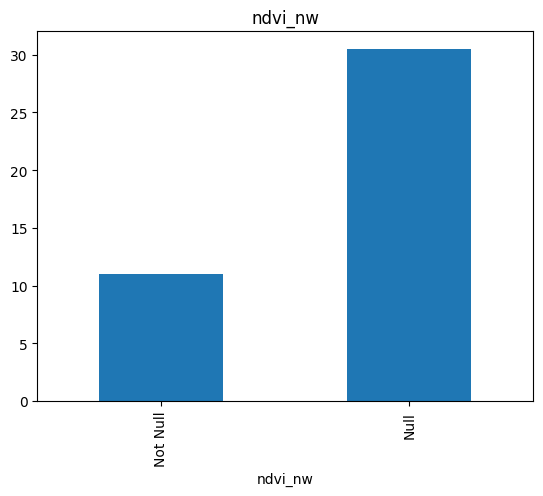

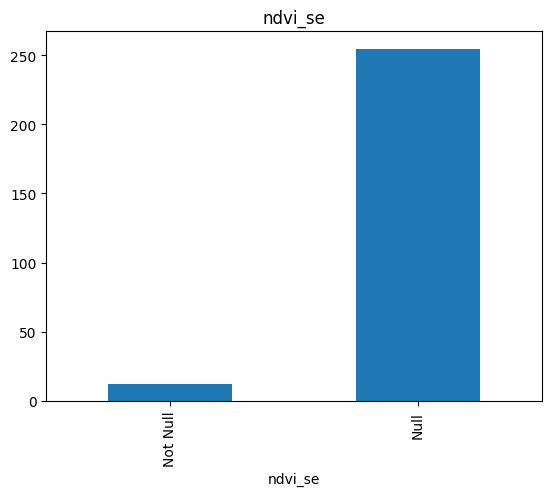

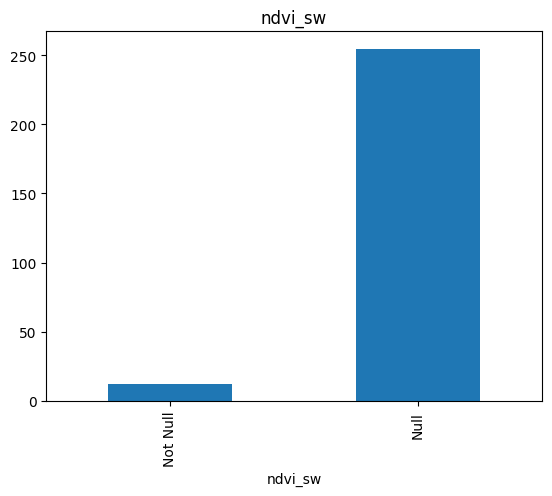

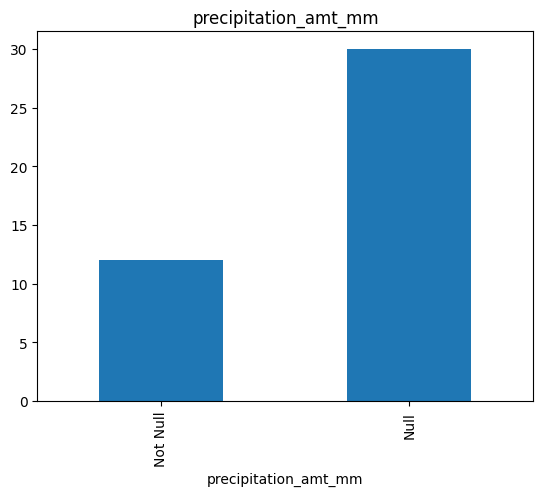

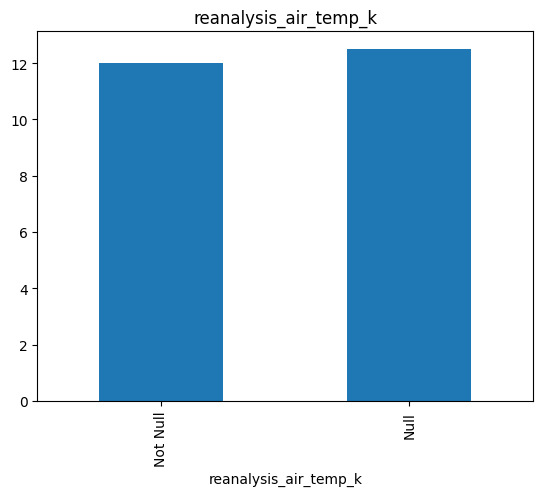

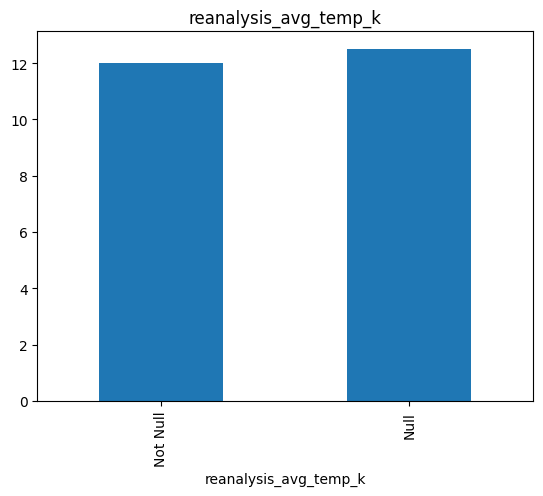

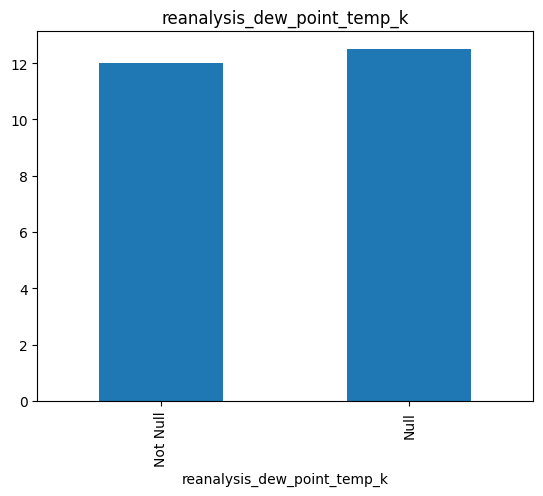

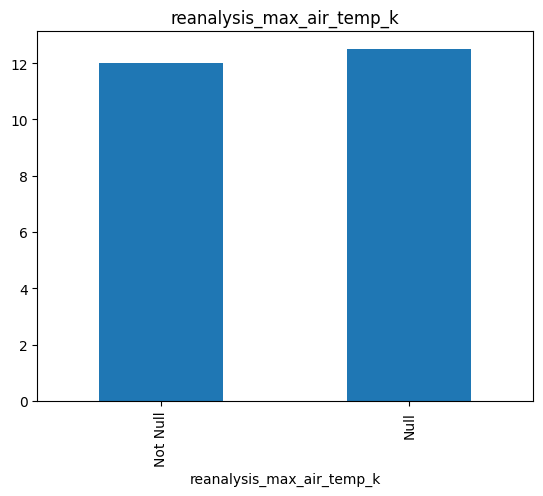

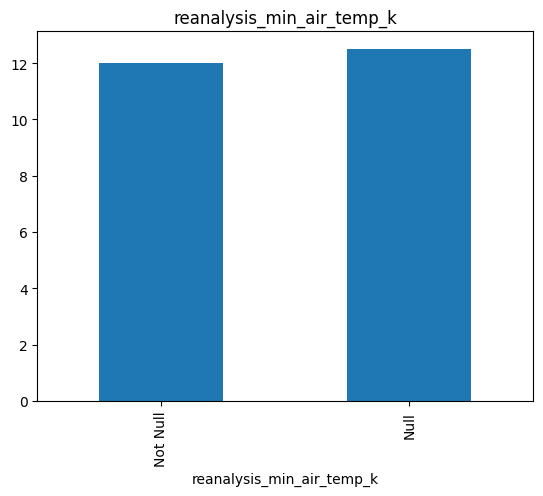

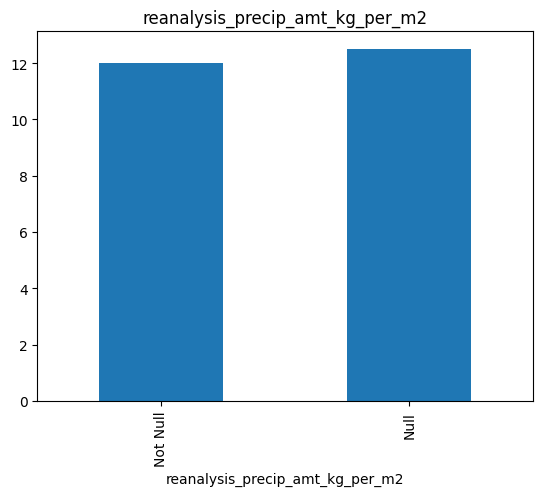

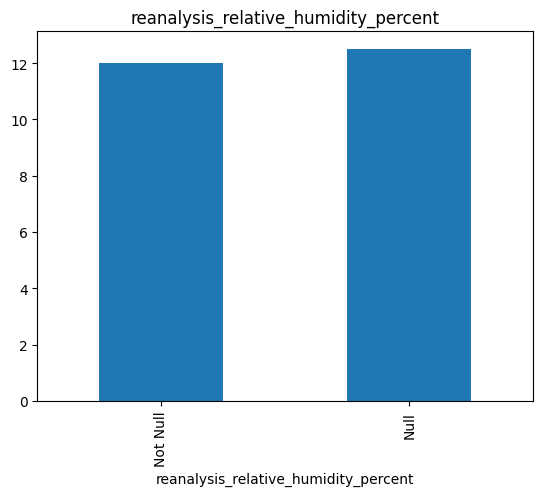

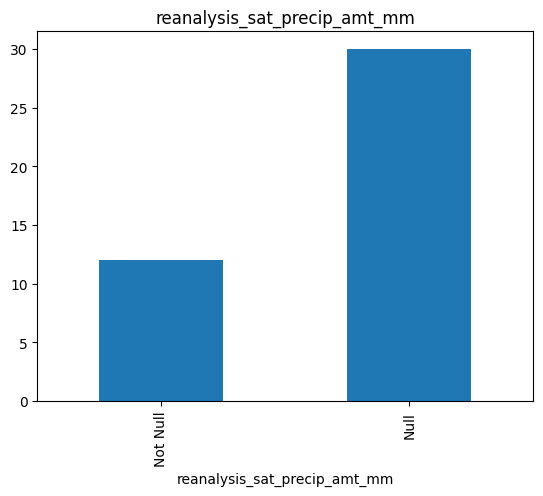

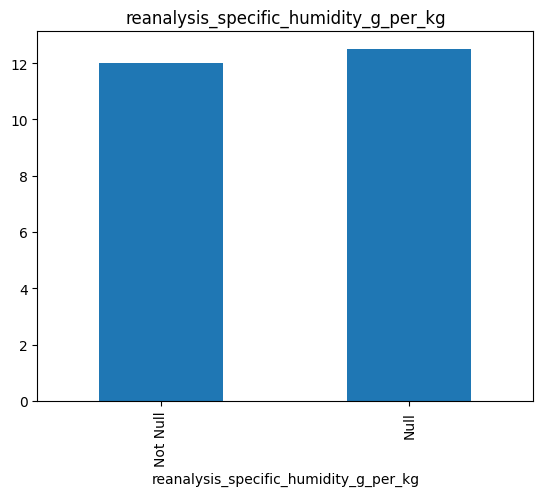

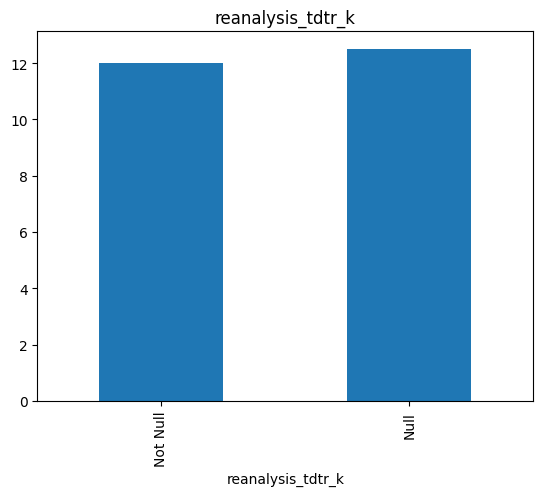

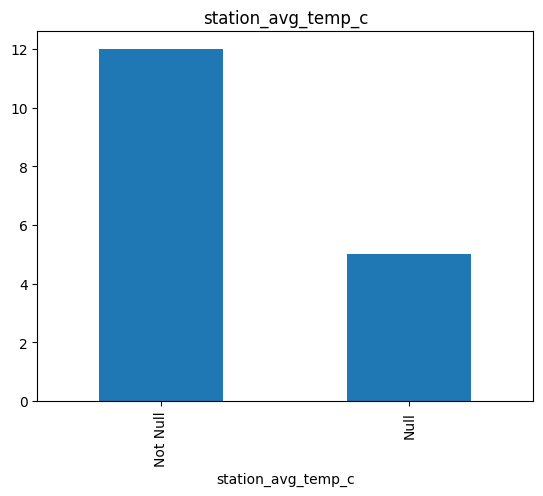

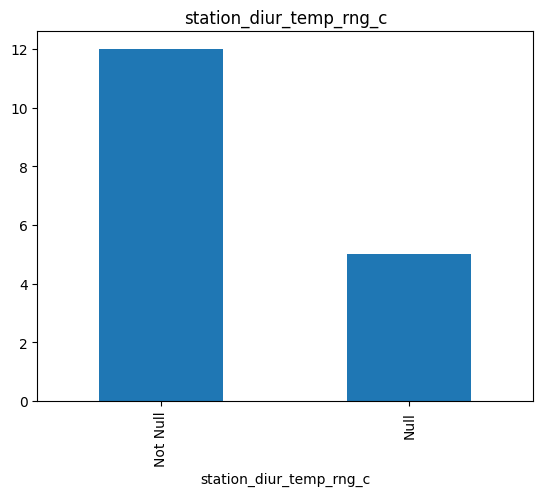

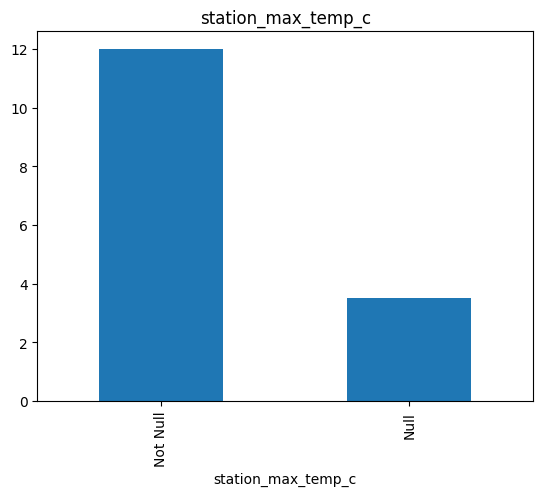

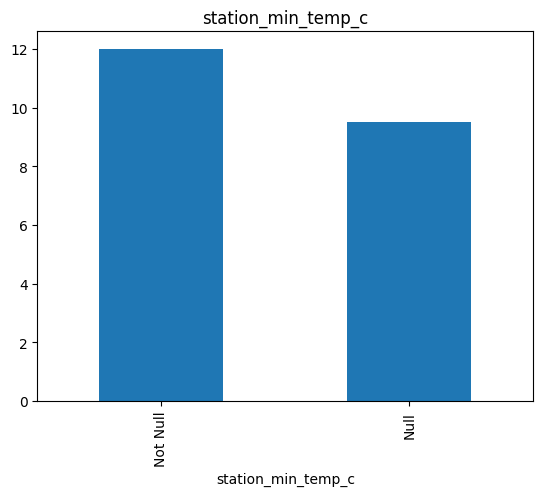

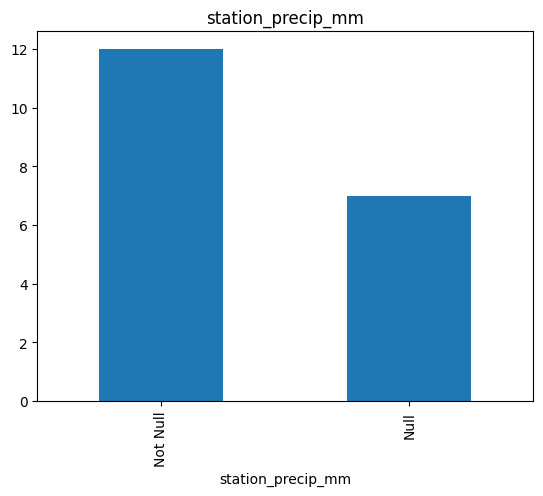

In [36]:
for feature in features_with_na:
    data = training_dataset.copy()
    data[feature]=np.where(data[feature].isnull(),"Null","Not Null")
    data.groupby(feature)['total_cases'].median().plot.bar()
    plt.title(feature)
    plt.show()

##### THERE IS A RELATIONSHIP BETWEEN MISSING VALUES AND TOTAL CASES.

#### 3. NUMERICAL VARIABLES

In [37]:
numerical_features = [feature for feature in training_dataset.columns if training_dataset[feature].dtypes != "O"]

print("Total count of Numerical Variables :",len(numerical_features))
training_dataset[numerical_features].head()

Total count of Numerical Variables : 26


year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0  1990          18  0.122600  0.103725  0.198483  0.177617   
1  1990          19  0.169900  0.142175  0.162357  0.155486   
2  1990          20  0.032250  0.172967  0.157200  0.170843   
3  1990          21  0.128633  0.245067  0.227557  0.235886   
4  1990          22  0.196200  0.262200  0.251200  0.247340   

   precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
0                 12.42             297.572857             297.742857   
1                 22.82             298.211429             298.442857   
2                 34.54             298.781429             298.878571   
3                 15.36             298.987143             299.228571   
4                  7.52             299.518571             299.664286   

   reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
0                   292.414286                      299.8   
1                   293.951429                      300.9   
2                   295.434286                      300.5   
3                   295.310000                      301.4   
4                   295.821429                      301.9   

   reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
0                      295.9                            32.00   
1                      296.4                            17.94   
2                      297.3                            26.10   
3                      297.0                            13.90   
4                      297.5                            12.20   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1                             77.368571                         22.82   
2                             82.052857                         34.54   
3                             80.337143                         15.36   
4                             80.460000                          7.52   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                              14.012857           2.628571   
1                              15.372857           2.371429   
2                              16.848571           2.300000   
3                              16.672857           2.428571   
4                              17.210000           3.014286   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0           25.442857                 6.900000                29.4   
1           26.714286                 6.371429                31.7   
2           26.714286                 6.485714                32.2   
3           27.471429                 6.771429                33.3   
4           28.942857                 9.371429                35.0   

   station_min_temp_c  station_precip_mm  total_cases  start_year  \
0                20.0               16.0            4        1990   
1                22.2                8.6            5        1990   
2                22.8               41.4            4        1990   
3                23.3                4.0            3        1990   
4                23.9                5.8            6        1990   

   start_month  start_date  
0            4          30  
1            5           7  
2            5          14  
3            5          21  
4            5          28

#### 3.1 TEMPORAL VARIABLES

In [38]:
year_features = [feature for feature in numerical_features if 'week' in feature or 'year' in feature or 'start' in feature]

year_features

['year', 'weekofyear', 'start_year', 'start_month', 'start_date']

Text(0, 0.5, 'Total Cases')

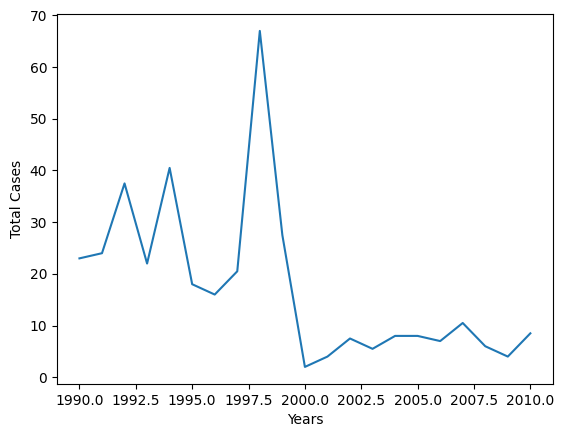

In [39]:
training_dataset.groupby('year')['total_cases'].median().plot()
plt.xlabel('Years')
plt.ylabel('Total Cases')

Text(0, 0.5, 'Total Cases')

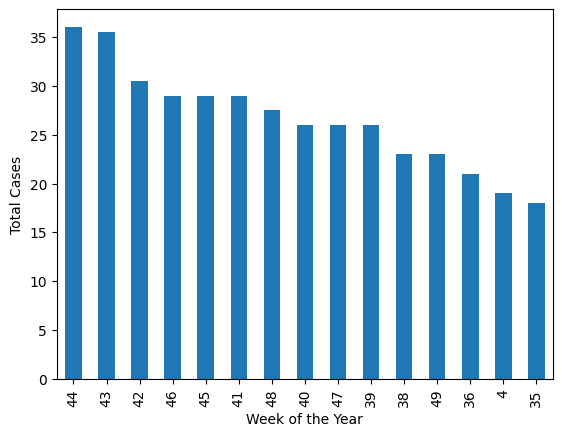

In [40]:
training_dataset.groupby('weekofyear')['total_cases'].median().sort_values(ascending=False).head(15).plot(kind='bar')
plt.xlabel('Week of the Year')
plt.ylabel('Total Cases')

Text(0, 0.5, 'Total Cases')

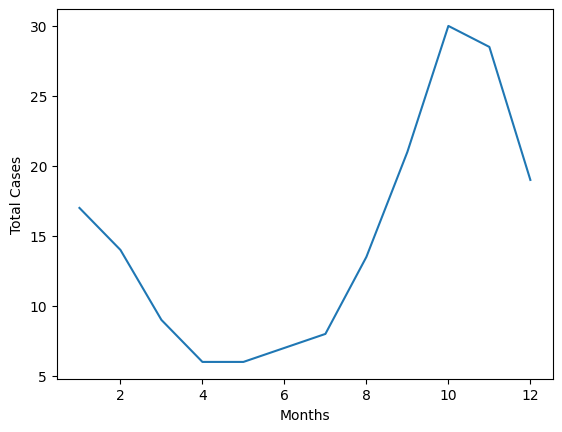

In [41]:
training_dataset.groupby('start_month')['total_cases'].median().plot()
plt.xlabel('Months')
plt.ylabel('Total Cases')

### OBSERVATIONS:
1. The total number of cases rises between the seventh and eleventh months.
2. Weeks 35 to 49 exhibit the highest incidence of dengue cases.
3. A significant surge in cases occurred during the period spanning from 1997 to 1999.

#### 3.2 CONTINUOUS VARIABLE

In [42]:
continuous_features = [feature for feature in numerical_features if len(training_dataset[feature].unique())>25 and feature not in year_features]

print("Continuous Variables Count :",len(continuous_features))
training_dataset[continuous_features].head()

Continuous Variables Count : 21


ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
0  0.122600  0.103725  0.198483  0.177617                 12.42   
1  0.169900  0.142175  0.162357  0.155486                 22.82   
2  0.032250  0.172967  0.157200  0.170843                 34.54   
3  0.128633  0.245067  0.227557  0.235886                 15.36   
4  0.196200  0.262200  0.251200  0.247340                  7.52   

   reanalysis_air_temp_k  reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0             297.572857             297.742857                   292.414286   
1             298.211429             298.442857                   293.951429   
2             298.781429             298.878571                   295.434286   
3             298.987143             299.228571                   295.310000   
4             299.518571             299.664286                   295.821429   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      299.8                      295.9   
1                      300.9                      296.4   
2                      300.5                      297.3   
3                      301.4                      297.0   
4                      301.9                      297.5   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  total_cases  
0                29.4                20.0               16.0            4  
1                31.7                22.2                8.6            5  
2                32.2                22.8               41.4            4  
3                33.3                23.3                4.0            3  
4                35.0                23.9                5.8            6

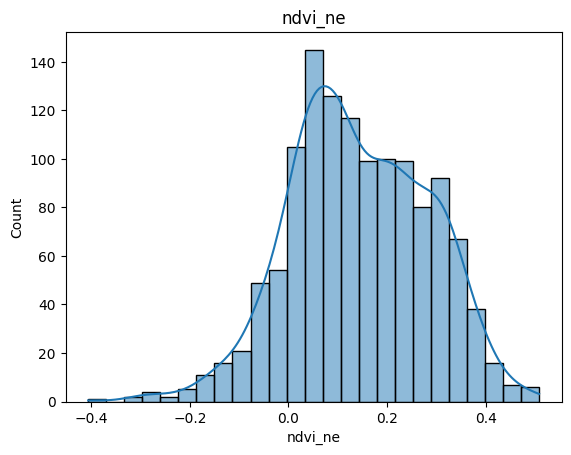

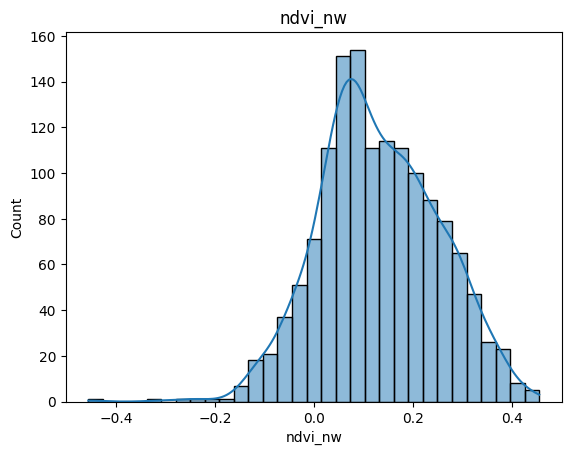

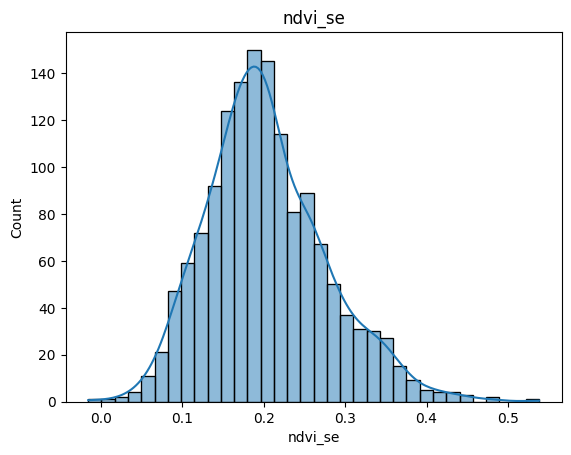

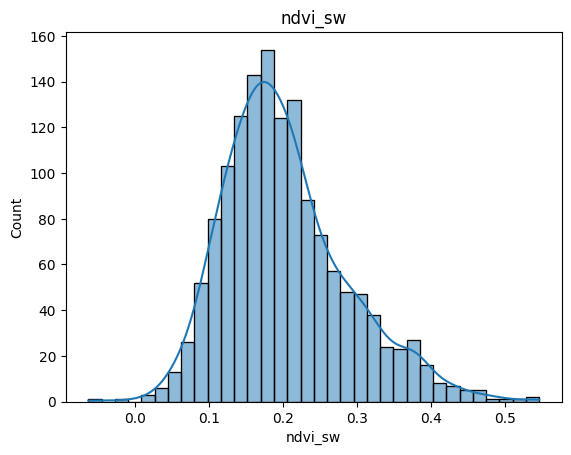

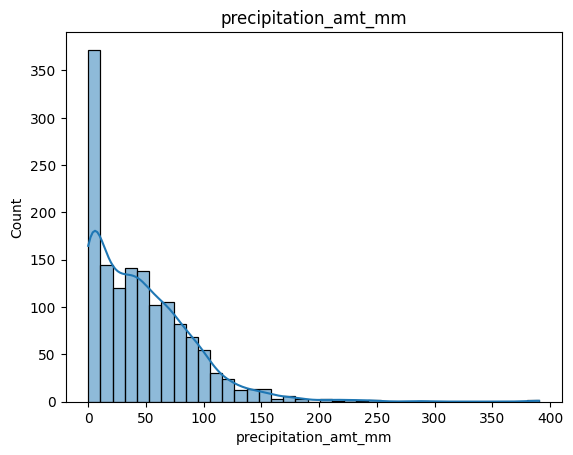

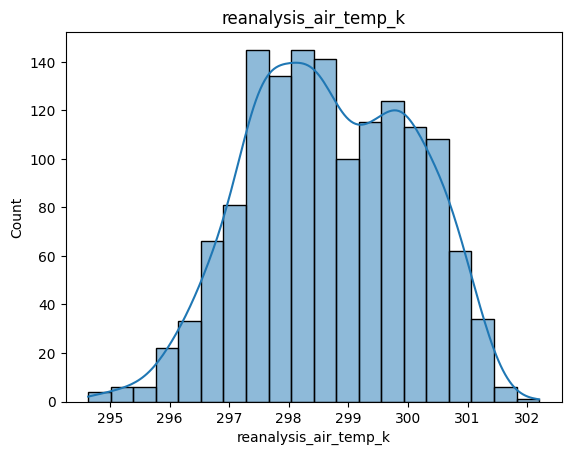

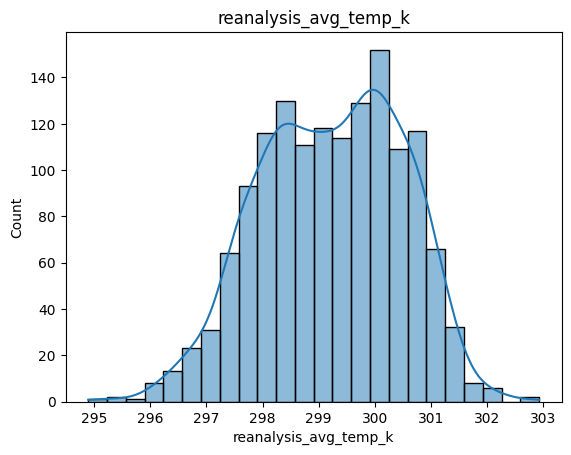

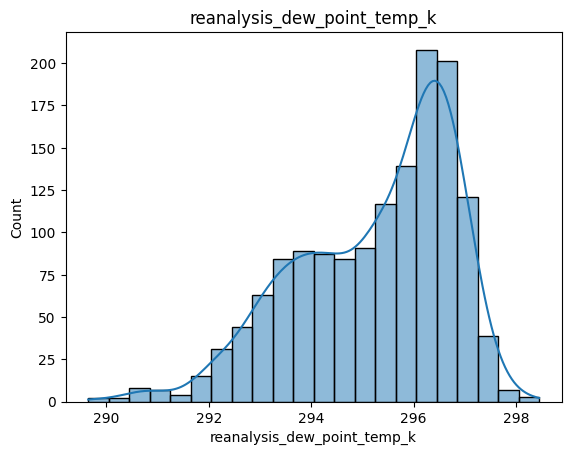

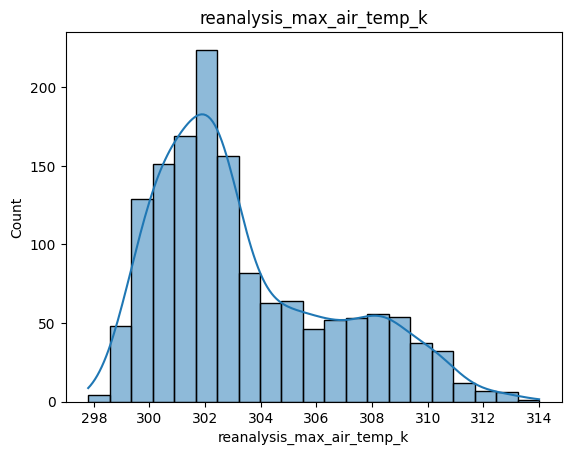

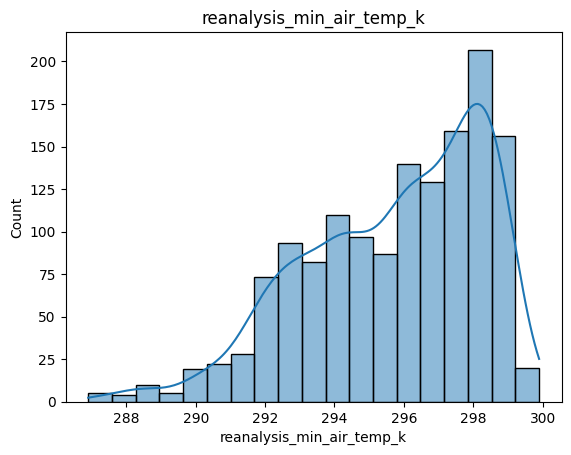

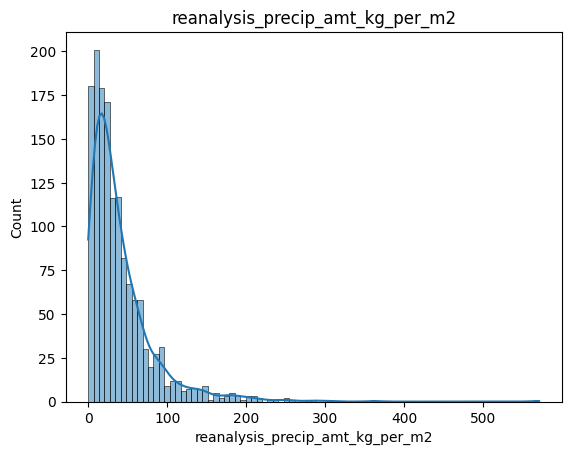

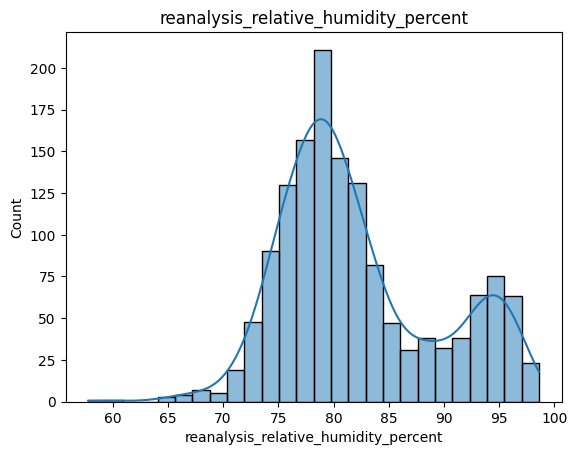

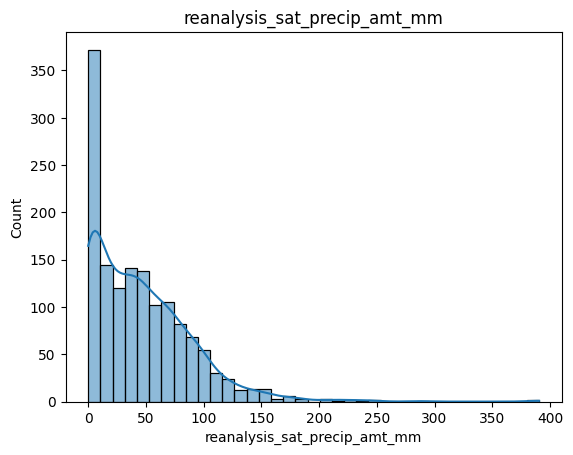

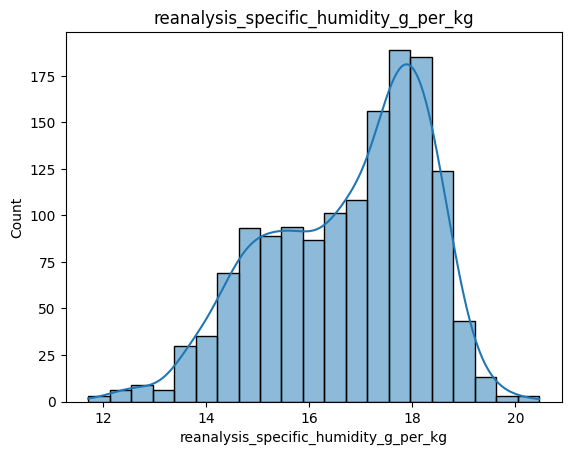

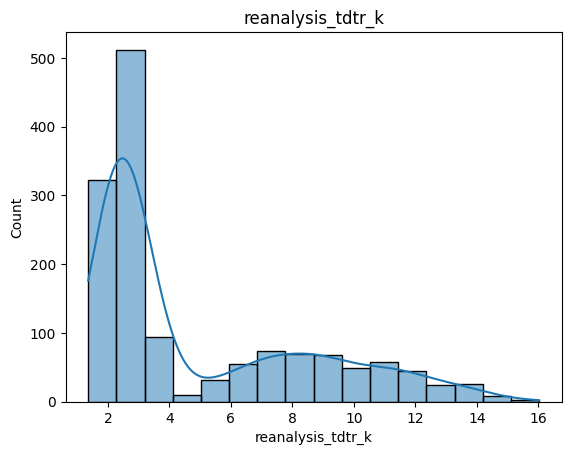

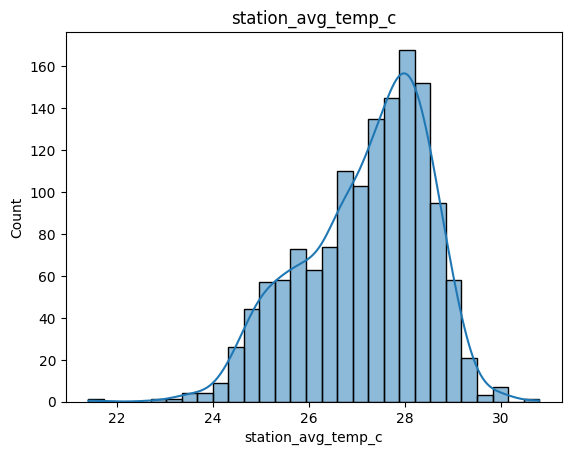

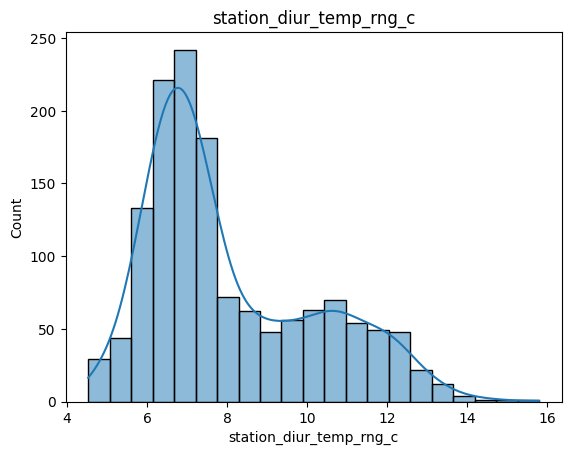

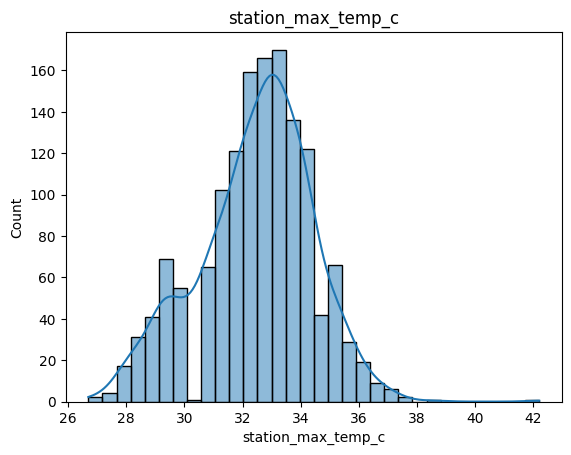

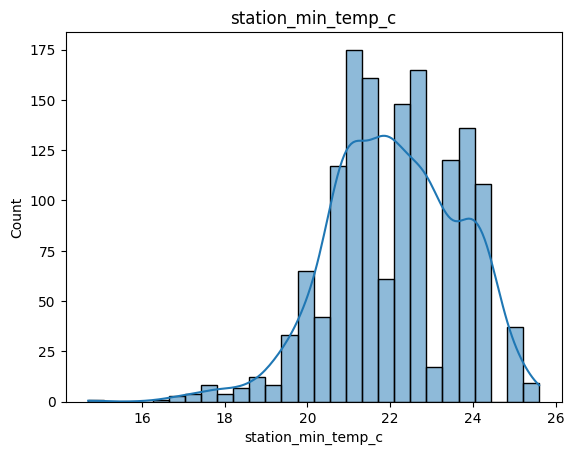

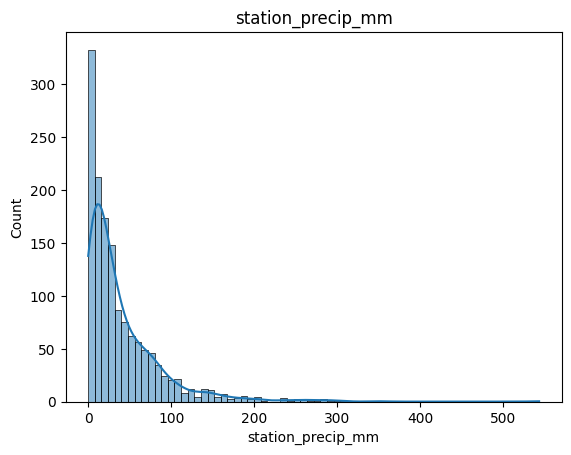

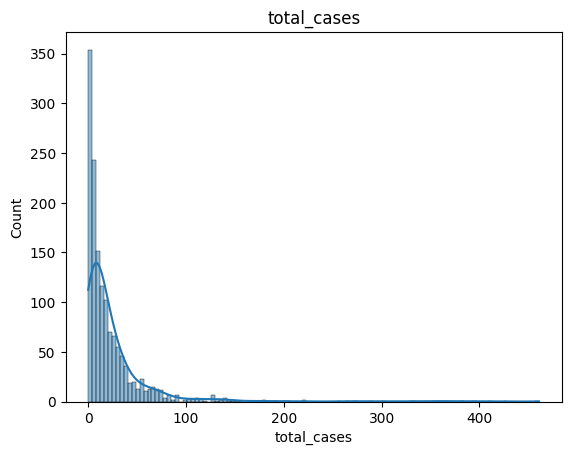

In [43]:
# LETS ANALYZE DISTRIBUTION OF CONTINUOUS VARIABLES
for feature in continuous_features:
    data = training_dataset.copy()
    if feature != "Id":
        sns.histplot(data[feature], kde=True)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

### OBSERVATION
- Nearly all of the columns we are examining demonstrate a distribution that is not symmetrical, indicating a tendency towards skewness.

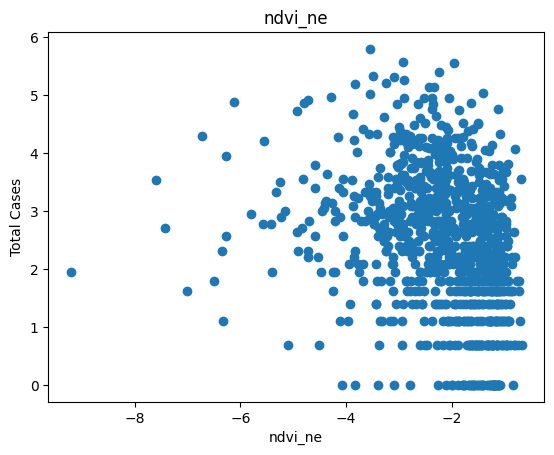

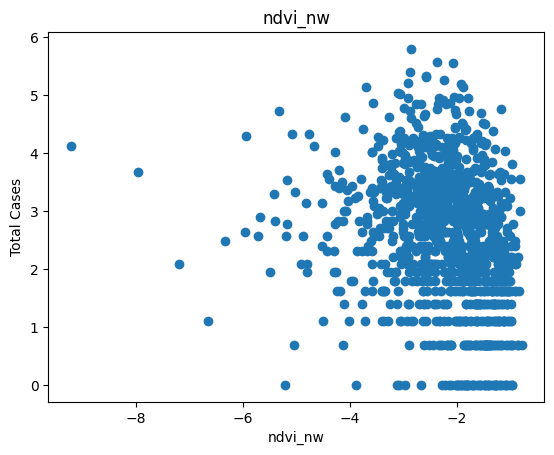

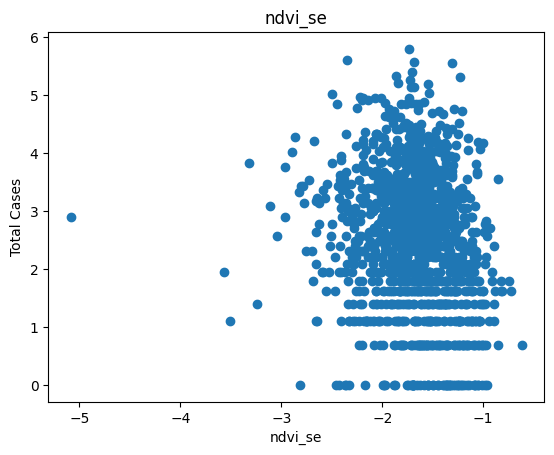

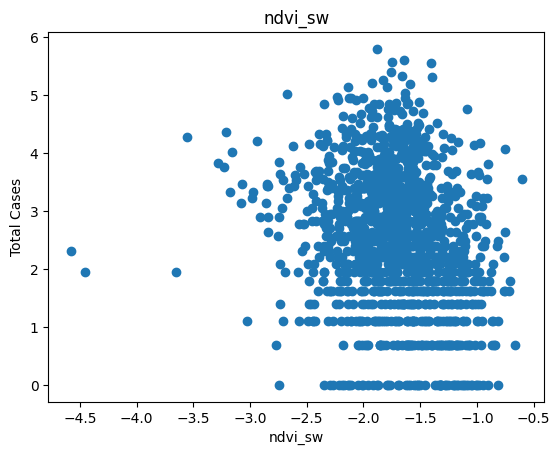

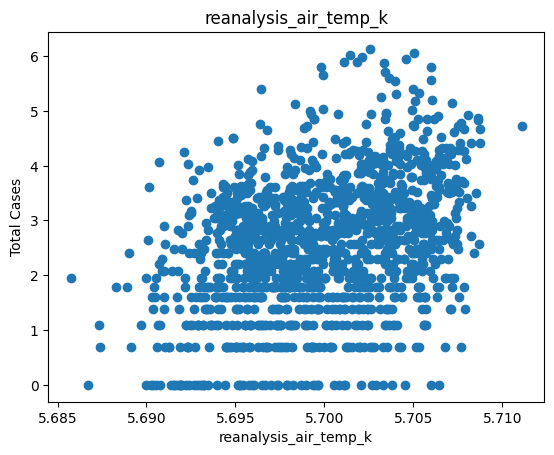

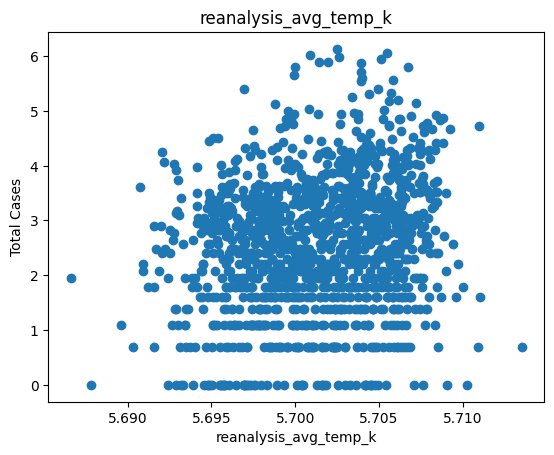

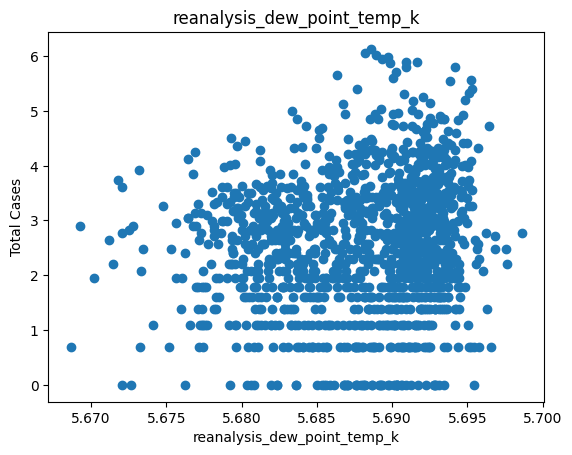

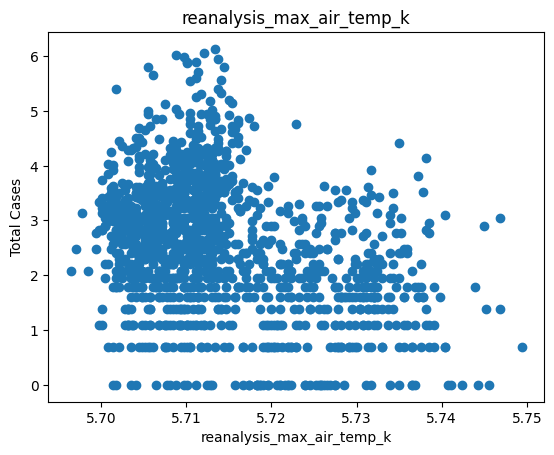

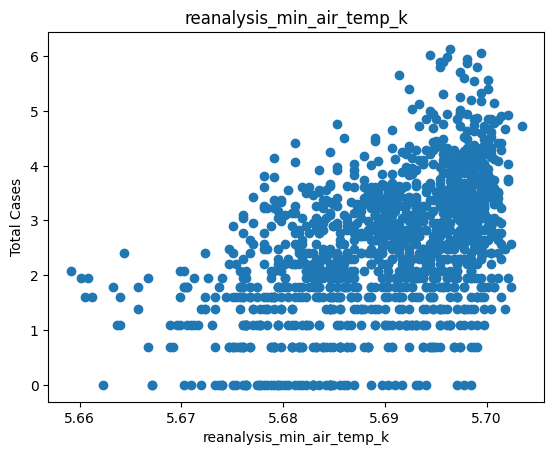

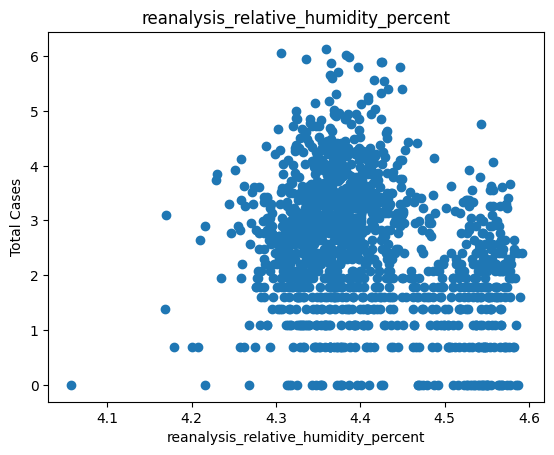

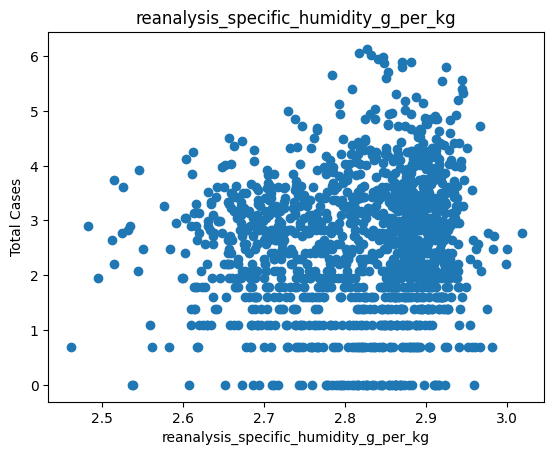

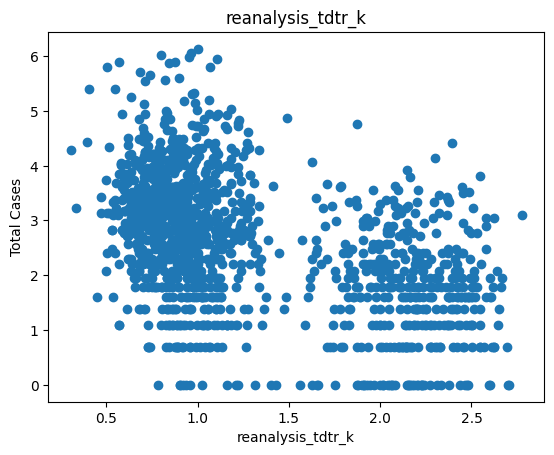

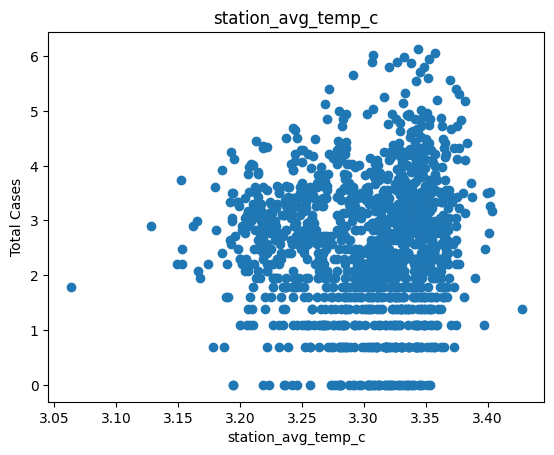

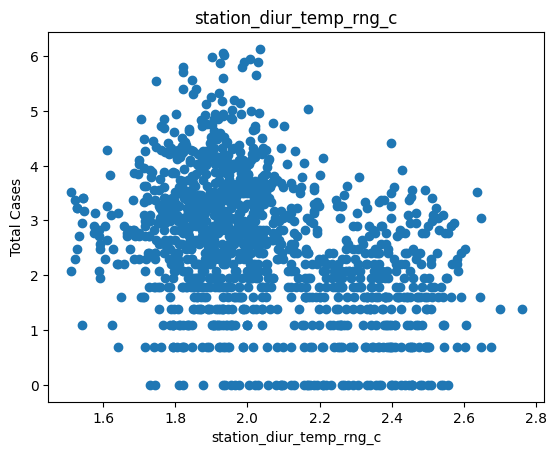

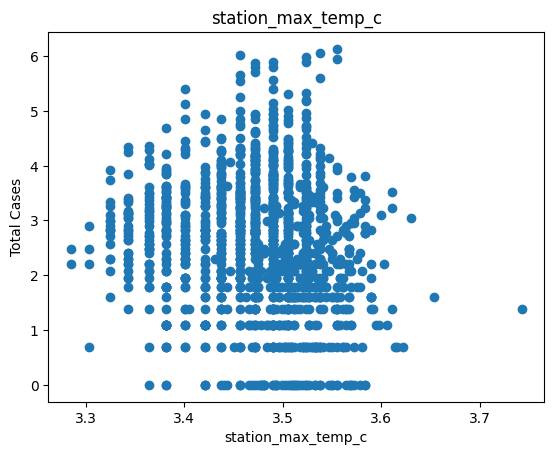

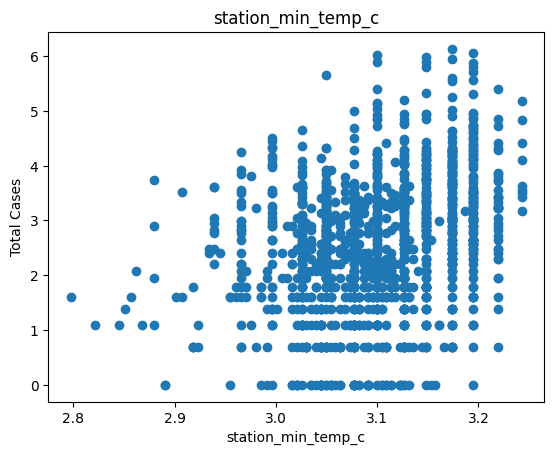

In [44]:
for feature in continuous_features:
    data=training_dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['total_cases']=np.log(data['total_cases'])
        plt.scatter(data[feature],data['total_cases'])
        plt.xlabel(feature)
        plt.ylabel('Total Cases')
        plt.title(feature)
        plt.show()

#### 4. OUTLIER DETECTION

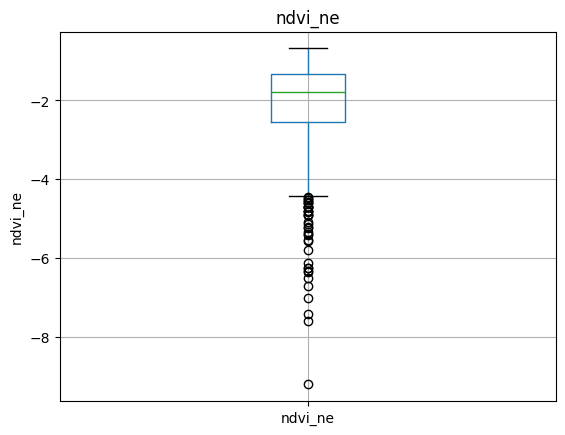

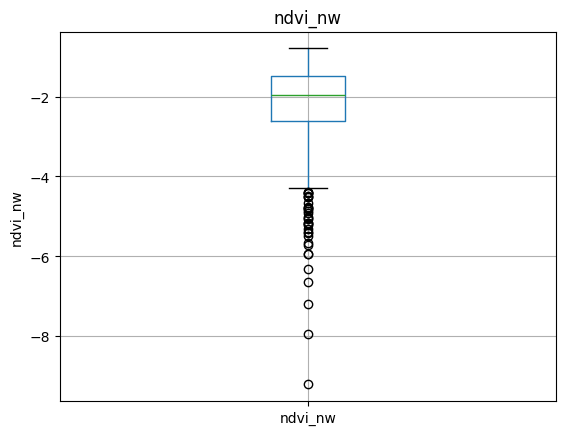

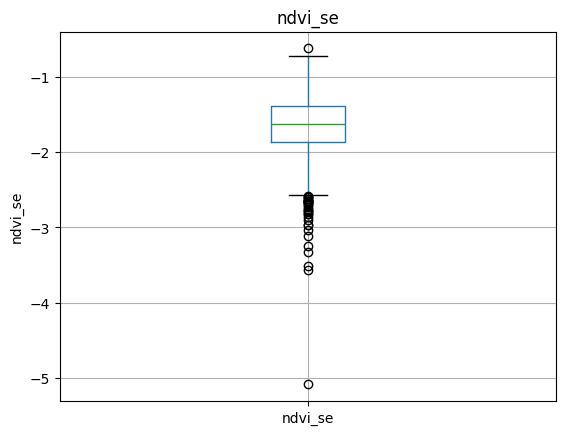

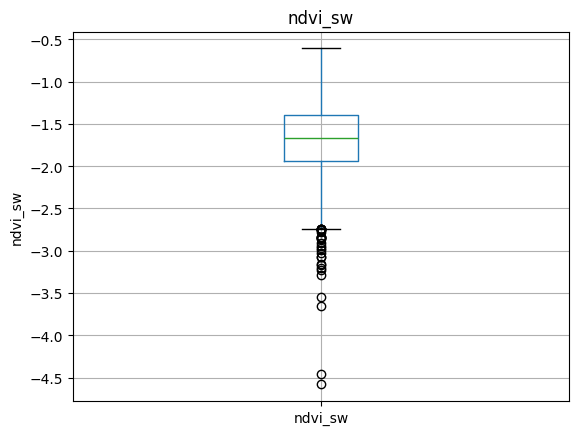

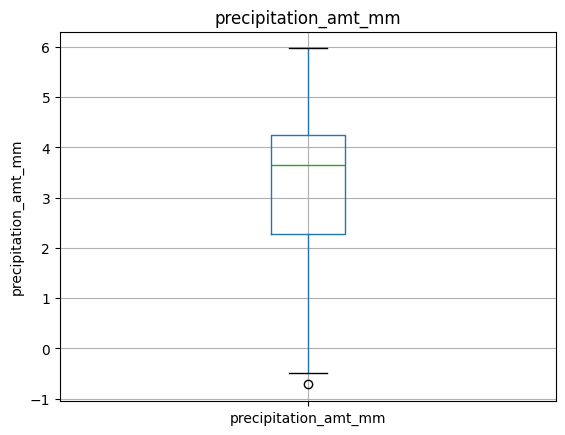

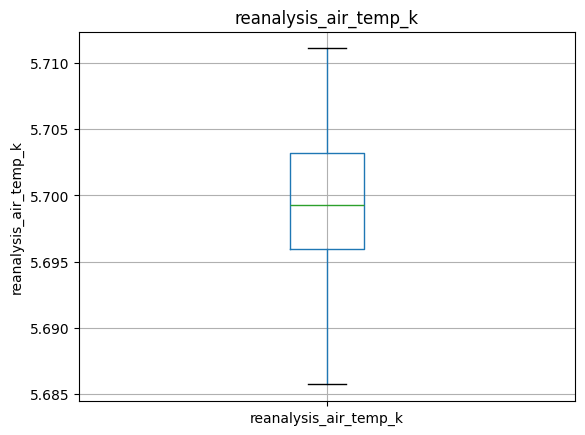

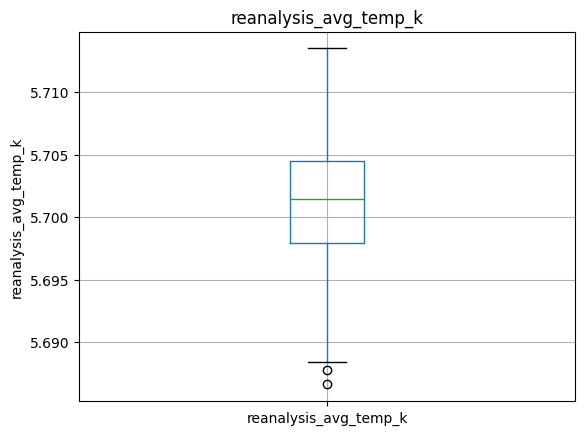

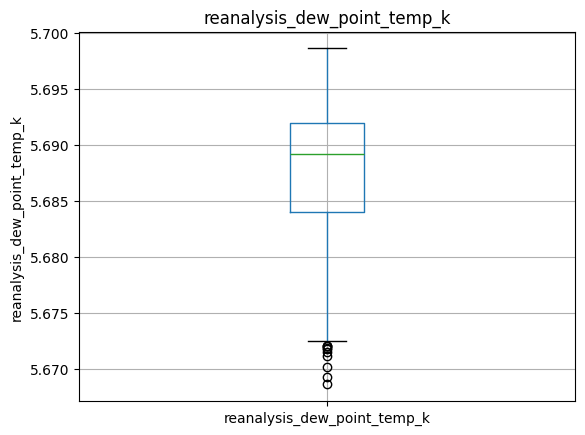

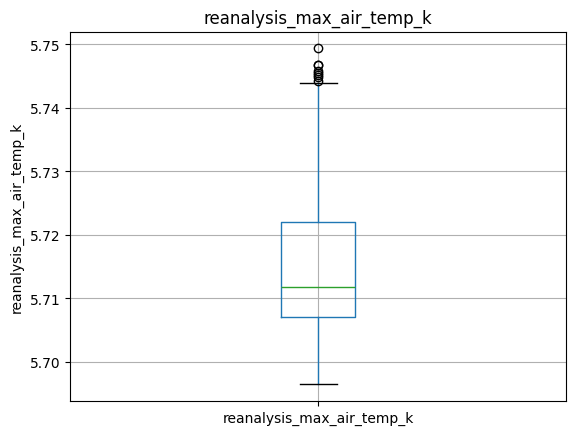

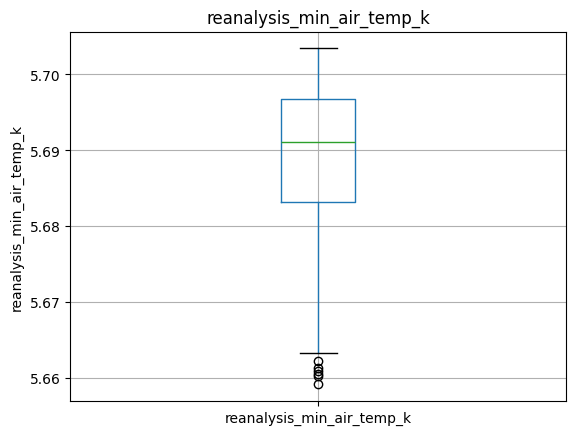

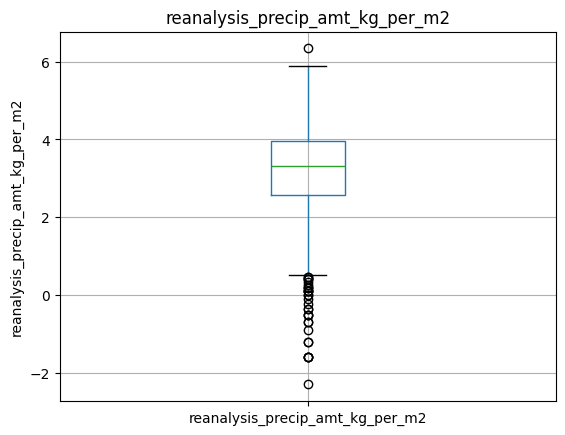

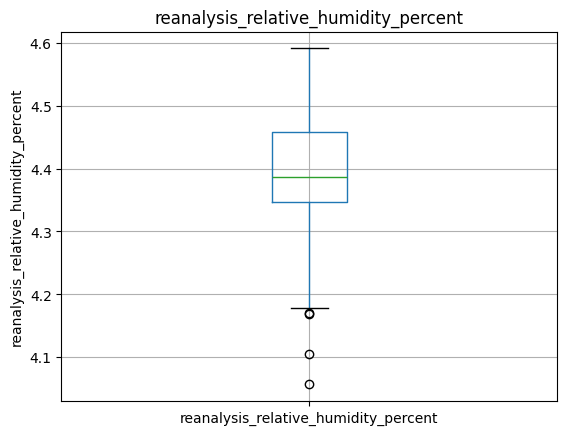

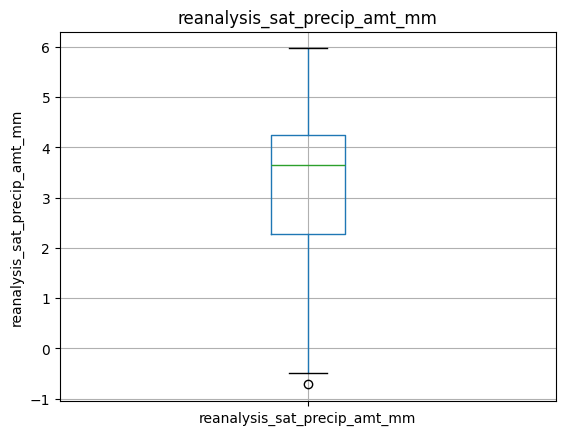

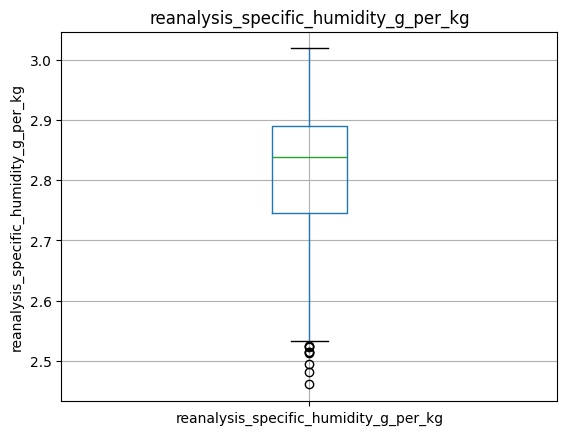

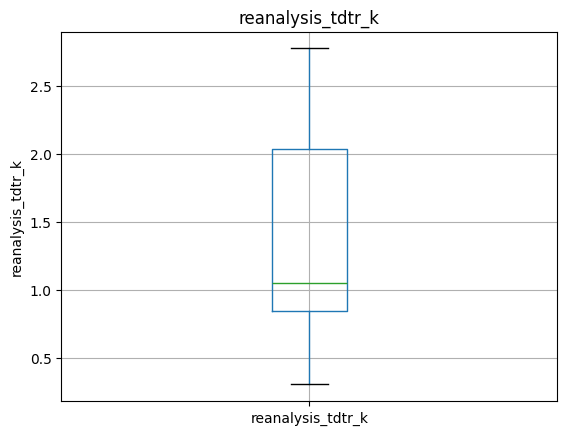

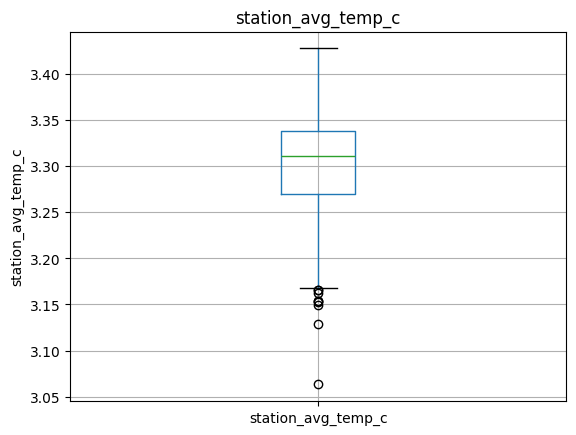

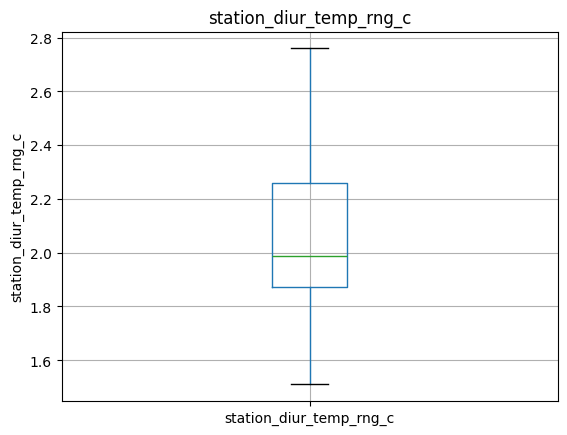

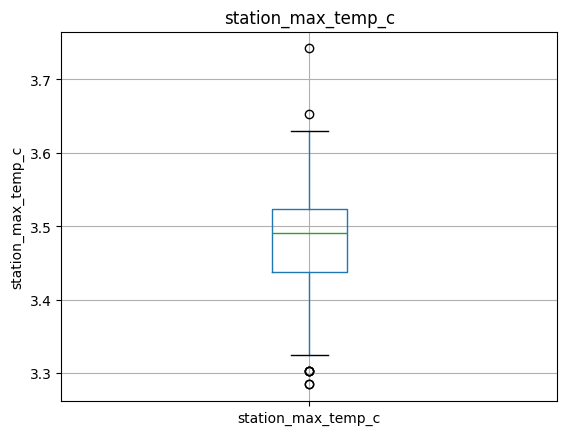

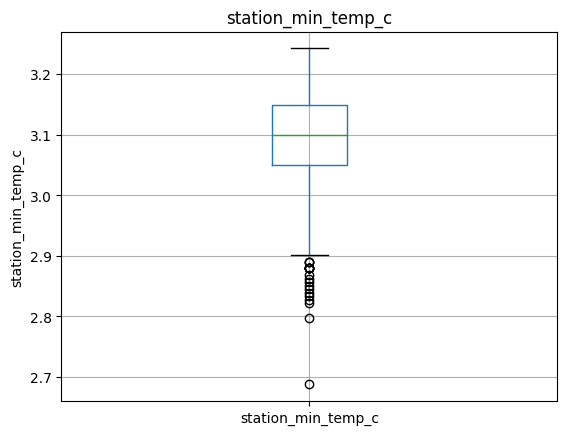

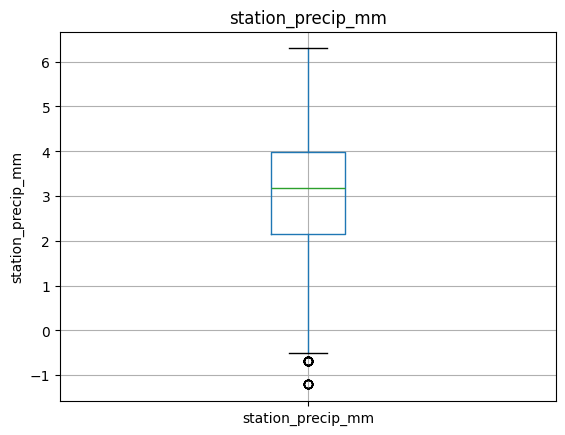

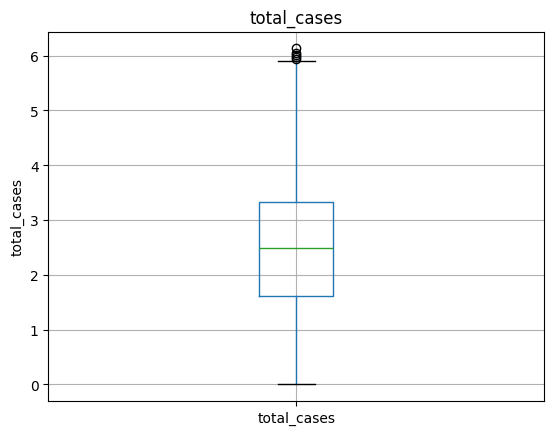

In [45]:
for feature in continuous_features:
    data=training_dataset.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### OBSERVATIONS:
- Several columns within the dataset have been identified as containing outliers.

#### 3.3 CATEGORICAL VARIABLES

In [46]:
categorical_features = [feature for feature in training_dataset.columns if training_dataset[feature].dtypes == "O"]
print("Count of Categorical Features :",len(categorical_features))
training_dataset[categorical_features].head()

Count of Categorical Features : 2


city week_start_date
0   sj      1990-04-30
1   sj      1990-05-07
2   sj      1990-05-14
3   sj      1990-05-21
4   sj      1990-05-28

In [47]:
training_dataset.city.value_counts()

city
sj    936
iq    520
Name: count, dtype: int64

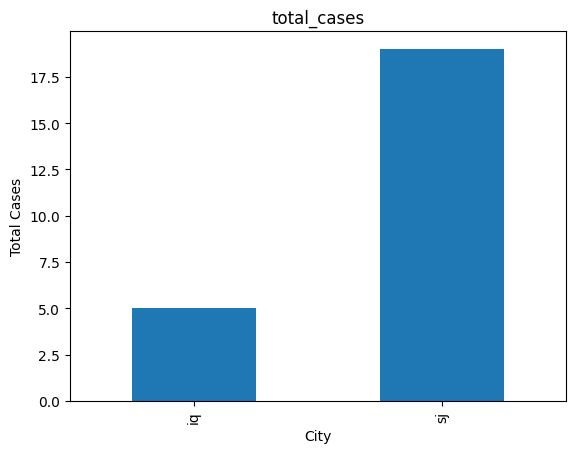

In [48]:
# LETS FIND RELATIONSHIP BETWEEN CITY AND TOTAL CASES
training_dataset.groupby('city')['total_cases'].median().plot.bar()
plt.xlabel('City')
plt.ylabel("Total Cases")
plt.title(feature)
plt.show()

#### OBSERVATION:
- In examining the total cases between the cities of SJ and IQ, it is observed that SJ has a greater number of  Dengue cases than IQ.

----------------------------

### TRAIN TEST SPLIT

In [49]:
## Splitting the data first and then apply Feature Engineering to avoid Data Leakage
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(training_dataset, test_size=0.2,random_state=0)

In [50]:
train_data.shape, test_data.shape

((1164, 28), (292, 28))

------------

### FEATURE ENGINEERING (TRAINING DATA)

#### 1. HANDLING THE MISSING VALUES

In [51]:
features_nan=[feature for feature in train_data.columns if train_data[feature].isnull().sum()>=1 ]

for feature in features_nan:
    print("{}: {} missing values".format(feature,train_data[feature].isnull().sum()))

ndvi_ne: 158 missing values
ndvi_nw: 43 missing values
ndvi_se: 19 missing values
ndvi_sw: 19 missing values
precipitation_amt_mm: 12 missing values
reanalysis_air_temp_k: 9 missing values
reanalysis_avg_temp_k: 9 missing values
reanalysis_dew_point_temp_k: 9 missing values
reanalysis_max_air_temp_k: 9 missing values
reanalysis_min_air_temp_k: 9 missing values
reanalysis_precip_amt_kg_per_m2: 9 missing values
reanalysis_relative_humidity_percent: 9 missing values
reanalysis_sat_precip_amt_mm: 12 missing values
reanalysis_specific_humidity_g_per_kg: 9 missing values
reanalysis_tdtr_k: 9 missing values
station_avg_temp_c: 37 missing values
station_diur_temp_rng_c: 37 missing values
station_max_temp_c: 17 missing values
station_min_temp_c: 13 missing values
station_precip_mm: 19 missing values


In [52]:
## Replacing the Missing Values
for feature in features_nan:
    ## Replacing by using median since there are outliers
    median_value=train_data[feature].median()
    train_data[feature].fillna(median_value,inplace=True)
    
train_data[features_nan].isnull().sum()  

ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

#### 2. DROPPING UNNECESSARY COLUMNS

In [53]:
train_data.drop(['week_start_date','start_year'], axis = 1, inplace = True)

In [54]:
train_data.head()

city  year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
1399   iq  2009          22  0.238343  0.197317  0.165500  0.190143   
1308   iq  2007          35  0.278786  0.246357  0.234986  0.373743   
679    sj  2003          21  0.128717  0.004100  0.152614  0.124357   
638    sj  2002          32 -0.000600  0.055100  0.251143  0.269657   
247    sj  1995           4  0.051750  0.126800  0.177229  0.134071   

      precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
1399                 40.04             296.704286             297.521429   
1308                 30.26             300.667143             301.592857   
679                  60.93             299.634286             299.707143   
638                  39.52             301.002857             301.200000   
247                   0.00             297.592857             298.014286   

      reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
1399                   296.264286                      305.1   
1308                   293.124286                      312.4   
679                    295.184286                      301.5   
638                    296.742857                      303.3   
247                    293.532857                      300.5   

      reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
1399                      292.7                            73.00   
1308                      293.4                            12.80   
679                       298.0                            13.76   
638                       298.0                             9.36   
247                       295.0                             6.20   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
1399                             97.742857                         40.04   
1308                             67.757143                         30.26   
679                              76.704286                         60.93   
638                              77.788571                         39.52   
247                              78.330000                          0.00   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
1399                              17.830000           5.614286   
1308                              14.794286          13.385714   
679                               16.572857           2.328571   
638                               18.201429           3.514286   
247                               14.947143           3.628571   

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
1399           27.600000                10.266667                34.4   
1308           27.050000                12.175000                34.7   
679            27.057143                 6.771429                31.1   
638            28.471429                 6.100000                32.2   
247            26.128571                 9.042857                32.8   

      station_min_temp_c  station_precip_mm  total_cases  start_month  \
1399                21.0               19.3            2            5   
1308                19.9                0.0            1            8   
679                 22.8               10.1            7            5   
638                 25.0                3.6            4            8   
247                 20.6                9.9           46            1   

      start_date  
1399          28  
1308          27  
679           21  
638            6  
247           29

#### 3. HANDLING OUTLIERS

Since the numerical variables are skewed we will perform log normal distribution

In [55]:
non_numerical_variables = ['year','weekofyear','month','city','start_month'	,'start_date']

In [56]:
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes != "O" and feature not in non_numerical_variables ]

print("Total count of Numerical Variables :",len(numerical_features))
train_data[numerical_features].head()

Total count of Numerical Variables : 21


ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
1399  0.238343  0.197317  0.165500  0.190143                 40.04   
1308  0.278786  0.246357  0.234986  0.373743                 30.26   
679   0.128717  0.004100  0.152614  0.124357                 60.93   
638  -0.000600  0.055100  0.251143  0.269657                 39.52   
247   0.051750  0.126800  0.177229  0.134071                  0.00   

      reanalysis_air_temp_k  reanalysis_avg_temp_k  \
1399             296.704286             297.521429   
1308             300.667143             301.592857   
679              299.634286             299.707143   
638              301.002857             301.200000   
247              297.592857             298.014286   

      reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
1399                   296.264286                      305.1   
1308                   293.124286                      312.4   
679                    295.184286                      301.5   
638                    296.742857                      303.3   
247                    293.532857                      300.5   

      reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
1399                      292.7                            73.00   
1308                      293.4                            12.80   
679                       298.0                            13.76   
638                       298.0                             9.36   
247                       295.0                             6.20   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
1399                             97.742857                         40.04   
1308                             67.757143                         30.26   
679                              76.704286                         60.93   
638                              77.788571                         39.52   
247                              78.330000                          0.00   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
1399                              17.830000           5.614286   
1308                              14.794286          13.385714   
679                               16.572857           2.328571   
638                               18.201429           3.514286   
247                               14.947143           3.628571   

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
1399           27.600000                10.266667                34.4   
1308           27.050000                12.175000                34.7   
679            27.057143                 6.771429                31.1   
638            28.471429                 6.100000                32.2   
247            26.128571                 9.042857                32.8   

      station_min_temp_c  station_precip_mm  total_cases  
1399                21.0               19.3            2  
1308                19.9                0.0            1  
679                 22.8               10.1            7  
638                 25.0                3.6            4  
247                 20.6                9.9           46

In [57]:
for feature in numerical_features:
    train_data[feature]=np.log(train_data[feature] + 1)

In [58]:
for feature in numerical_features :
    IQR = train_data[feature].quantile(0.75) - train_data[feature].quantile(0.25)

    lower_bridge =train_data[feature].quantile(0.25)-(1.5*IQR)
    upper_bridge = train_data[feature].quantile(0.75)+(1.5*IQR)
    
    # Replacing values above the upper boundary with the upper boundary
    train_data.loc[train_data[feature] >= upper_bridge, feature] = upper_bridge
    
    # Replacing values below the lower boundary with the lower boundary
    train_data.loc[train_data[feature] <= lower_bridge, feature] = lower_bridge

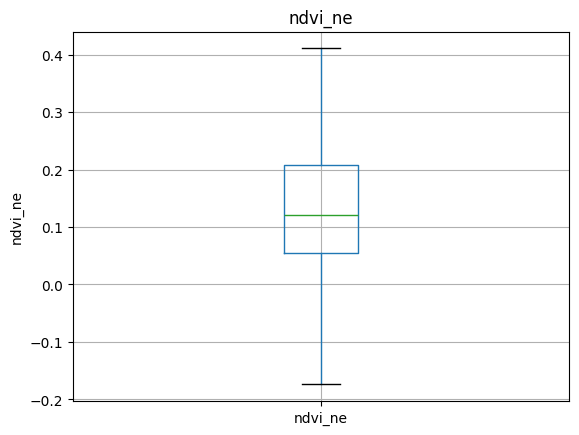

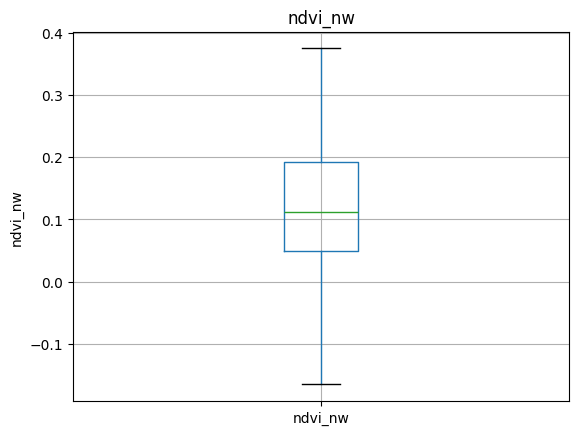

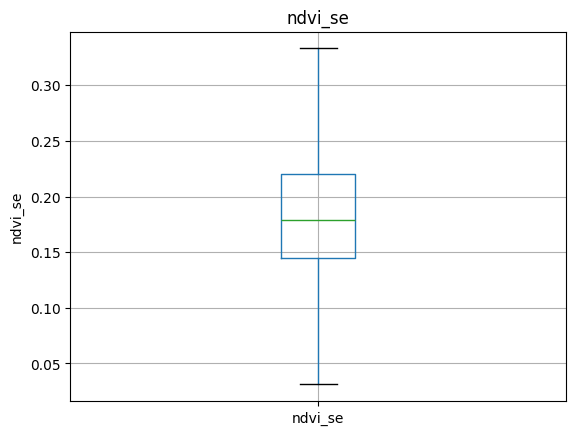

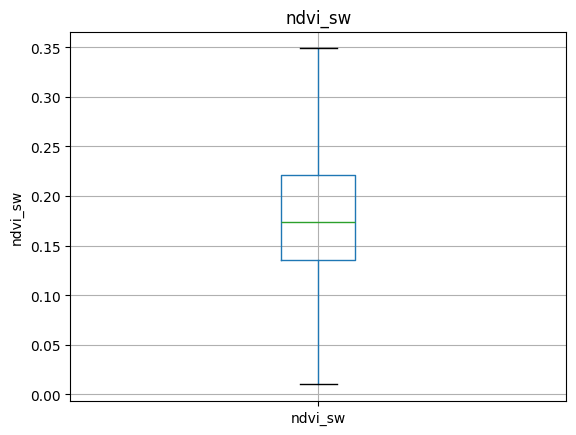

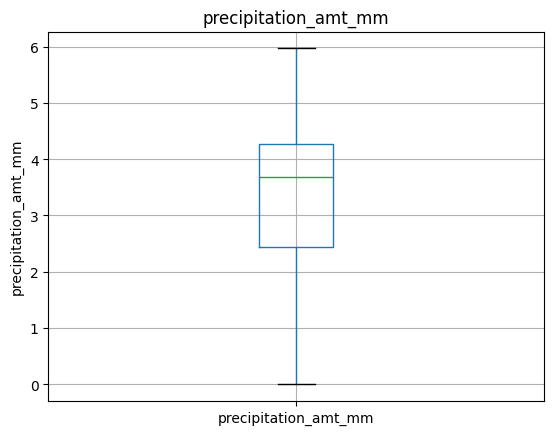

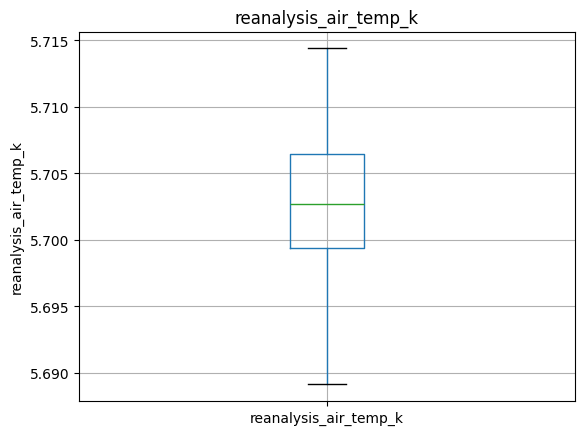

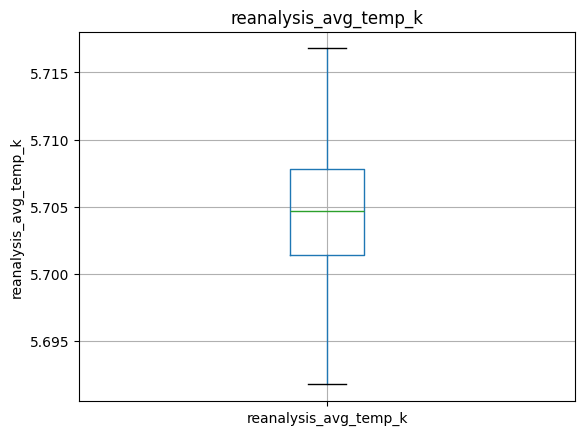

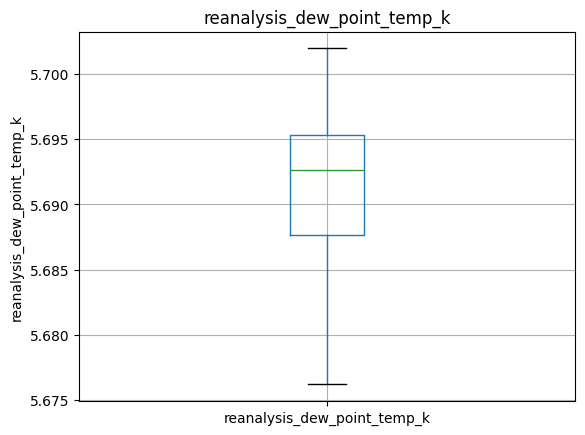

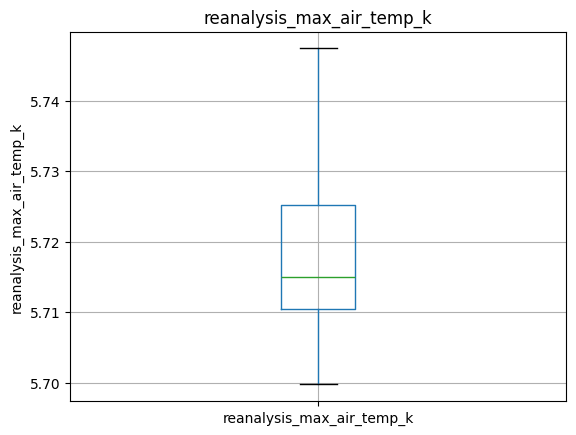

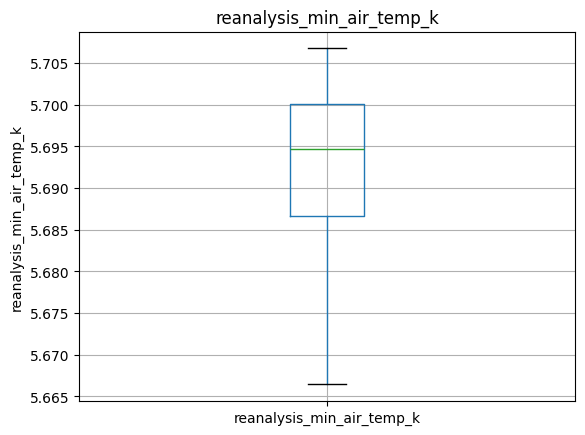

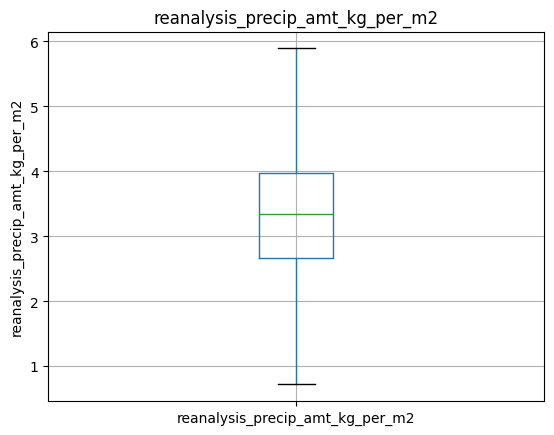

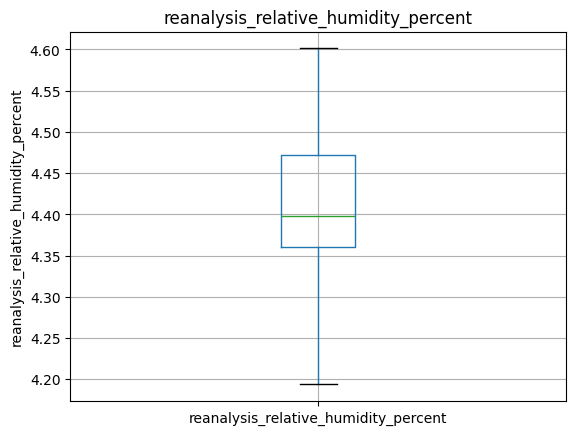

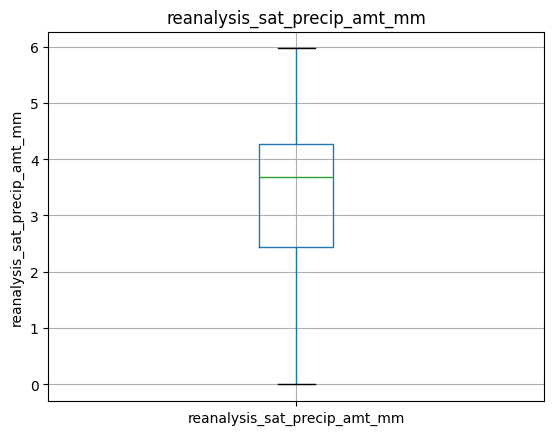

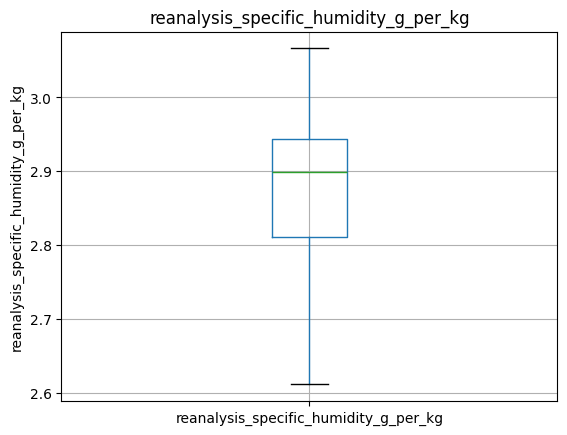

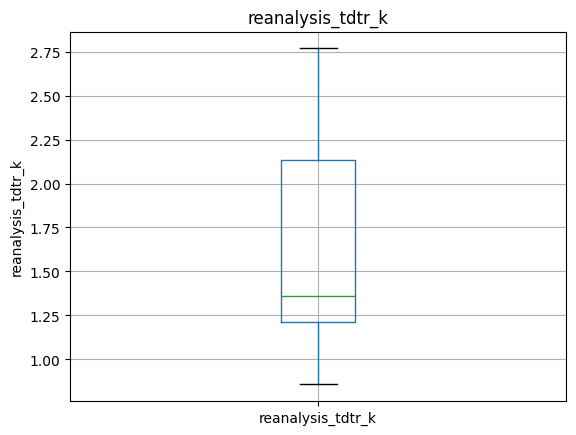

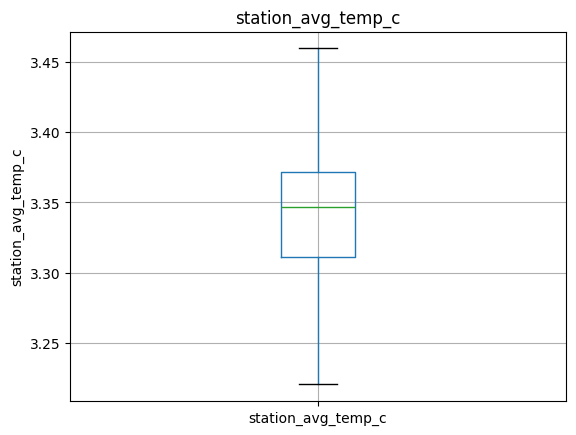

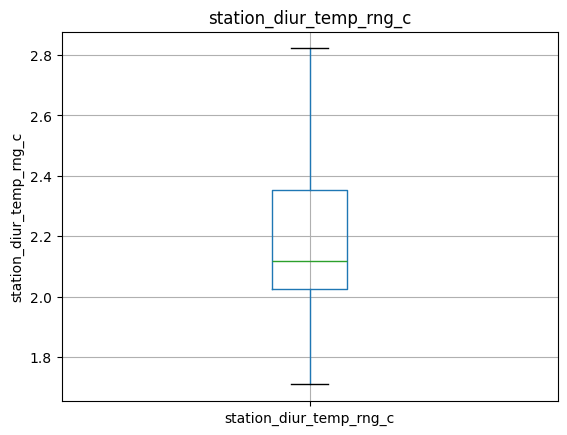

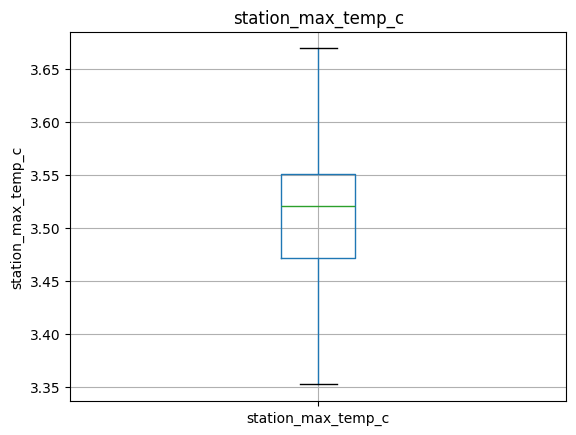

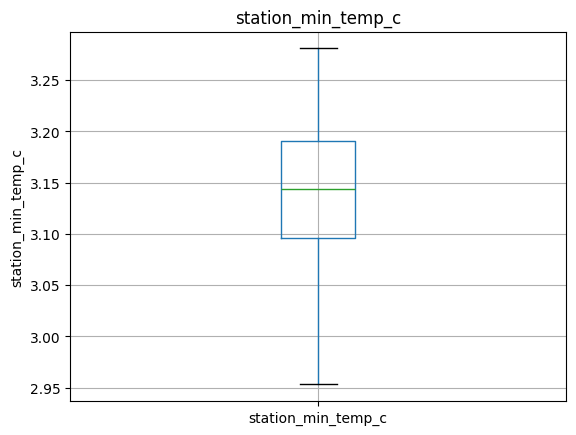

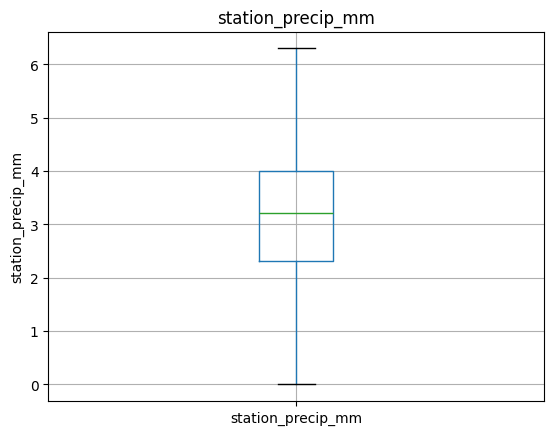

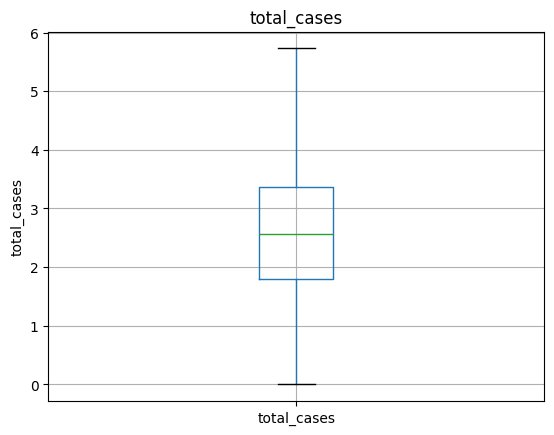

In [59]:
for feature in numerical_features:
    data=train_data.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

#### 4. HANDLING CATEGORICAL VARIABLE

In [60]:
# Replacing 'sj' with 0 and 'iq' with 1
train_data['city'] = train_data['city'].map({'sj': 0, 'iq': 1})

In [61]:
train_data.head()

city  year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
1399     1  2009          22  0.213774  0.180083  0.153150  0.174073   
1308     1  2007          35  0.245911  0.220225  0.211059  0.317539   
679      0  2003          21  0.121081  0.004092  0.142033  0.117211   
638      0  2002          32 -0.000600  0.053636  0.224057  0.238747   
247      0  1995           4  0.050455  0.119382  0.163163  0.125814   

      precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
1399              3.714547               5.696101               5.698842   
1308              3.442339               5.709324               5.712388   
679               4.126005               5.705895               5.706137   
638               3.701796               5.710436               5.711089   
247               0.000000               5.699081               5.700491   

      reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
1399                     5.694622                   5.723912   
1308                     5.684002                   5.747404   
679                      5.690982                   5.712081   
638                      5.696230                   5.718014   
247                      5.685391                   5.708770   

      reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
1399                   5.682559                         4.304065   
1308                   5.684939                         2.624669   
679                    5.700444                         2.691921   
638                    5.700444                         2.337952   
247                    5.690359                         1.974081   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
1399                              4.592519                      3.714547   
1308                              4.230581                      3.442339   
679                               4.352910                      4.126005   
638                               4.366768                      3.701796   
247                               4.373616                      0.000000   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
1399                               2.935451           1.889232   
1308                               2.759648           2.666236   
679                                2.866356           1.202543   
638                                2.954985           1.507247   
247                                2.769280           1.532248   

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
1399            3.353407                 2.421849            3.566712   
1308            3.333989                 2.578321            3.575151   
679             3.334243                 2.050454            3.468856   
638             3.383421                 1.960095            3.502550   
247             3.300587                 2.306862            3.520461   

      station_min_temp_c  station_precip_mm  total_cases  start_month  \
1399            3.091042           3.010621     1.098612            5   
1308            3.039749           0.000000     0.693147            8   
679             3.169686           2.406945     2.079442            5   
638             3.258097           1.526056     1.609438            8   
247             3.072693           2.388763     3.850148            1   

      start_date  
1399          28  
1308          27  
679           21  
638            6  
247           29

#### 5. HANDLING TEMPORAL VARIABLES

In [62]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
encoded_years = ordinal_encoder.fit_transform(train_data[['year']])

train_data['year'] = encoded_years

In [63]:
train_data.year.unique()

array([19., 17., 13., 12.,  5., 11.,  3.,  0.,  7., 18.,  9.,  6., 15.,
       16., 14.,  8., 20., 10.,  4.,  1.,  2.])

In [64]:
train_data.head()

city  year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
1399     1  19.0          22  0.213774  0.180083  0.153150  0.174073   
1308     1  17.0          35  0.245911  0.220225  0.211059  0.317539   
679      0  13.0          21  0.121081  0.004092  0.142033  0.117211   
638      0  12.0          32 -0.000600  0.053636  0.224057  0.238747   
247      0   5.0           4  0.050455  0.119382  0.163163  0.125814   

      precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
1399              3.714547               5.696101               5.698842   
1308              3.442339               5.709324               5.712388   
679               4.126005               5.705895               5.706137   
638               3.701796               5.710436               5.711089   
247               0.000000               5.699081               5.700491   

      reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
1399                     5.694622                   5.723912   
1308                     5.684002                   5.747404   
679                      5.690982                   5.712081   
638                      5.696230                   5.718014   
247                      5.685391                   5.708770   

      reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
1399                   5.682559                         4.304065   
1308                   5.684939                         2.624669   
679                    5.700444                         2.691921   
638                    5.700444                         2.337952   
247                    5.690359                         1.974081   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
1399                              4.592519                      3.714547   
1308                              4.230581                      3.442339   
679                               4.352910                      4.126005   
638                               4.366768                      3.701796   
247                               4.373616                      0.000000   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
1399                               2.935451           1.889232   
1308                               2.759648           2.666236   
679                                2.866356           1.202543   
638                                2.954985           1.507247   
247                                2.769280           1.532248   

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
1399            3.353407                 2.421849            3.566712   
1308            3.333989                 2.578321            3.575151   
679             3.334243                 2.050454            3.468856   
638             3.383421                 1.960095            3.502550   
247             3.300587                 2.306862            3.520461   

      station_min_temp_c  station_precip_mm  total_cases  start_month  \
1399            3.091042           3.010621     1.098612            5   
1308            3.039749           0.000000     0.693147            8   
679             3.169686           2.406945     2.079442            5   
638             3.258097           1.526056     1.609438            8   
247             3.072693           2.388763     3.850148            1   

      start_date  
1399          28  
1308          27  
679           21  
638            6  
247           29

#### 5. FEATURE SCALING

In [65]:
scale_features = []
for feature in train_data.columns:
    if feature != "total_cases":
        scale_features.append(feature)

In [66]:
scale_features

['city',
 'year',
 'weekofyear',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 'start_month',
 'start_date']

In [67]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
train_data[scale_features] = standard_scaler.fit_transform(train_data[scale_features])

In [68]:
train_data.head()

city      year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
1399  1.343436  1.468065   -0.298210  0.778888  0.603261 -0.510233 -0.121850   
1308  1.343436  1.094836    0.569748  1.065093  0.988737  0.479438  2.023550   
679  -0.744360  0.348379   -0.364976 -0.046616 -1.086750 -0.700232 -0.972170   
638  -0.744360  0.161764    0.369450 -1.130288 -0.610990  0.701576  0.845284   
247  -0.744360 -1.144536   -1.499997 -0.675596  0.020359 -0.339113 -0.843524   

      precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
1399              0.378019              -1.483370              -1.379035   
1308              0.207228               1.446297               1.894642   
679               0.636180               0.686449               0.383924   
638               0.370019               1.692713               1.580687   
247              -1.952602              -0.823088              -0.980381   

      reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
1399                     0.659243                   0.546338   
1308                    -1.456967                   2.824386   
679                     -0.066093                  -0.600886   
638                      0.979813                  -0.025578   
247                     -1.180335                  -0.921983   

      reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
1399                  -1.196236                         1.020066   
1308                  -0.919444                        -0.642497   
679                    0.883268                        -0.575919   
638                    0.883268                        -0.926339   
247                   -0.289239                        -1.286563   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
1399                              2.076672                      0.378019   
1308                             -2.246671                      0.207228   
679                              -0.785445                      0.636180   
638                              -0.619918                      0.370019   
247                              -0.538114                     -1.952602   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
1399                               0.698125           0.513846   
1308                              -1.316785           1.988573   
679                               -0.093794          -0.789467   
638                                0.922000          -0.211149   
247                               -1.206397          -0.163697   

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
1399            0.329898                 1.123932            1.001162   
1308           -0.104027                 1.842894            1.147716   
679            -0.098337                -0.582556           -0.698255   
638             1.000616                -0.997739           -0.113109   
247            -0.850424                 0.595589            0.197942   

      station_min_temp_c  station_precip_mm  total_cases  start_month  \
1399           -0.697332          -0.042563     1.098612    -0.406457   
1308           -1.456267          -2.427034     0.693147     0.466450   
679             0.466269          -0.520686     2.079442    -0.406457   
638             1.774396          -1.218367     1.609438     0.466450   
247            -0.968826          -0.535087     3.850148    -1.570333   

      start_date  
1399    1.442092  
1308    1.327933  
679     0.642978  
638    -1.069407  
247     1.556251

------------------------

### FEATURE ENGINEERING (TESTING DATA)

#### 1. HANDLING THE MISSING VALUES

In [69]:
features_nan=[feature for feature in test_data.columns if test_data[feature].isnull().sum()>=1 ]

for feature in features_nan:
    print("{}: {} missing values".format(feature,test_data[feature].isnull().sum()))

ndvi_ne: 36 missing values
ndvi_nw: 9 missing values
ndvi_se: 3 missing values
ndvi_sw: 3 missing values
precipitation_amt_mm: 1 missing values
reanalysis_air_temp_k: 1 missing values
reanalysis_avg_temp_k: 1 missing values
reanalysis_dew_point_temp_k: 1 missing values
reanalysis_max_air_temp_k: 1 missing values
reanalysis_min_air_temp_k: 1 missing values
reanalysis_precip_amt_kg_per_m2: 1 missing values
reanalysis_relative_humidity_percent: 1 missing values
reanalysis_sat_precip_amt_mm: 1 missing values
reanalysis_specific_humidity_g_per_kg: 1 missing values
reanalysis_tdtr_k: 1 missing values
station_avg_temp_c: 6 missing values
station_diur_temp_rng_c: 6 missing values
station_max_temp_c: 3 missing values
station_min_temp_c: 1 missing values
station_precip_mm: 3 missing values


In [70]:
## Replacing the Missing Values
for feature in features_nan:
    ## We will replace by using median since there are outliers
    median_value=train_data[feature].median()
    test_data[feature].fillna(median_value,inplace=True)
    
test_data[features_nan].isnull().sum()    

ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

#### 2. DROPPING UNNECESSARY COLUMNS

In [71]:
test_data.drop(['start_year','week_start_date'], axis = 1, inplace = True)

In [72]:
test_data.head()

city  year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
511   sj  2000           8 -0.046616  0.207500  0.150757  0.146917   
961   iq  2000          51  0.265014  0.169057  0.234867  0.302243   
231   sj  1994          40 -0.046616 -0.049350 -0.069979 -0.121850   
687   sj  2003          29 -0.056750 -0.112667  0.224871  0.186900   
34    sj  1990          52  0.302500  0.277233  0.171267  0.161622   

     precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
511                  7.67             297.088571             297.221429   
961                  3.90             300.411429             302.000000   
231                  0.63             300.377143             300.500000   
687                 62.57             300.154286             300.342857   
34                   0.00             298.038571             298.085714   

     reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
511                   292.174286                      298.9   
961                   291.092857                      311.2   
231                   295.362857                      302.5   
687                   296.315714                      301.7   
34                    292.105714                      299.8   

     reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
511                      295.3                            13.41   
961                      294.6                             5.70   
231                      298.7                             2.80   
687                      298.4                            21.90   
34                       295.3                             5.46   

     reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
511                             74.064286                          7.67   
961                             60.641429                          3.90   
231                             74.117143                          0.63   
687                             79.744286                         62.57   
34                              69.681429                          0.00   

     reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
511                              13.670000           1.985714   
961                              13.188571          13.000000   
231                              16.744286           2.628571   
687                              17.724286           1.914286   
34                               13.682857           2.285714   

     station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
511           24.771429                 6.628571                28.3   
961           28.200000                12.283333                35.0   
231           28.714286                 6.900000                34.4   
687           27.471429                 5.885714                31.7   
34            25.157143                 5.842857                28.9   

     station_min_temp_c  station_precip_mm  total_cases  start_month  \
511                20.6                3.8            4            2   
961                21.0                0.0            0           12   
231                24.4                8.2          426           10   
687                21.7               43.0           25            7   
34                 21.1               20.9           27           12   

     start_date  
511          26  
961          23  
231           8  
687          16  
34           24

#### 3. HANDLING OUTLIERS

In [73]:
non_numerical_variables = ['year','weekofyear','month','city','start_month','start_date']

In [74]:
numerical_features = [feature for feature in test_data.columns if test_data[feature].dtypes != "O" and feature not in non_numerical_variables ]

print("Total count of Numerical Variables :",len(numerical_features))
test_data[numerical_features].head()

Total count of Numerical Variables : 21


ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
511 -0.046616  0.207500  0.150757  0.146917                  7.67   
961  0.265014  0.169057  0.234867  0.302243                  3.90   
231 -0.046616 -0.049350 -0.069979 -0.121850                  0.63   
687 -0.056750 -0.112667  0.224871  0.186900                 62.57   
34   0.302500  0.277233  0.171267  0.161622                  0.00   

     reanalysis_air_temp_k  reanalysis_avg_temp_k  \
511             297.088571             297.221429   
961             300.411429             302.000000   
231             300.377143             300.500000   
687             300.154286             300.342857   
34              298.038571             298.085714   

     reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
511                   292.174286                      298.9   
961                   291.092857                      311.2   
231                   295.362857                      302.5   
687                   296.315714                      301.7   
34                    292.105714                      299.8   

     reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
511                      295.3                            13.41   
961                      294.6                             5.70   
231                      298.7                             2.80   
687                      298.4                            21.90   
34                       295.3                             5.46   

     reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
511                             74.064286                          7.67   
961                             60.641429                          3.90   
231                             74.117143                          0.63   
687                             79.744286                         62.57   
34                              69.681429                          0.00   

     reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
511                              13.670000           1.985714   
961                              13.188571          13.000000   
231                              16.744286           2.628571   
687                              17.724286           1.914286   
34                               13.682857           2.285714   

     station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
511           24.771429                 6.628571                28.3   
961           28.200000                12.283333                35.0   
231           28.714286                 6.900000                34.4   
687           27.471429                 5.885714                31.7   
34            25.157143                 5.842857                28.9   

     station_min_temp_c  station_precip_mm  total_cases  
511                20.6                3.8            4  
961                21.0                0.0            0  
231                24.4                8.2          426  
687                21.7               43.0           25  
34                 21.1               20.9           27

In [75]:
for feature in numerical_features:
    test_data[feature]=np.log(test_data[feature] + 1)

In [76]:
for feature in numerical_features :
    IQR = test_data[feature].quantile(0.75) - test_data[feature].quantile(0.25)

    lower_bridge =test_data[feature].quantile(0.25)-(1.5*IQR)
    upper_bridge = test_data[feature].quantile(0.75)+(1.5*IQR)
    
    #Replacing values above the upper boundary with the upper boundary
    test_data.loc[test_data[feature] >= upper_bridge, feature] = upper_bridge# Replacing values below the lower boundary with the lower boundary
    test_data.loc[test_data[feature] <= lower_bridge, feature] = lower_bridge

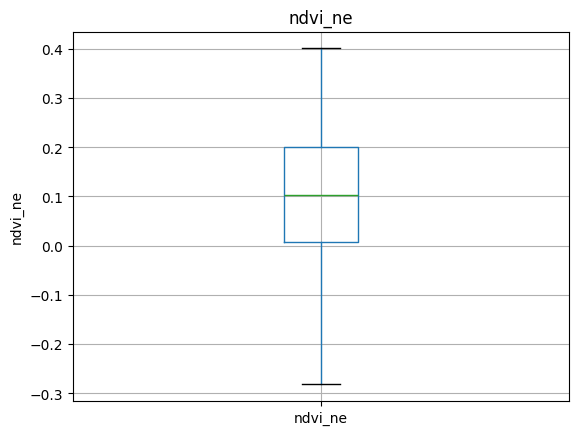

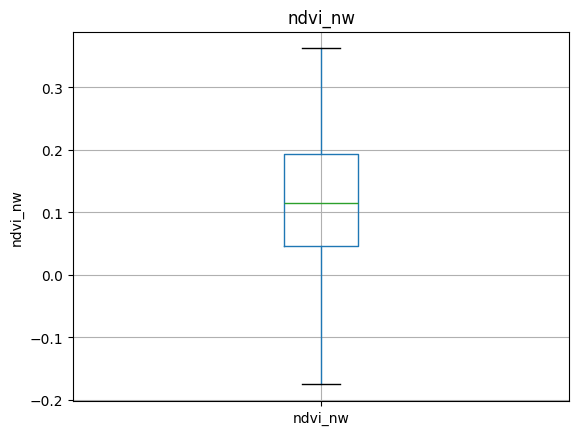

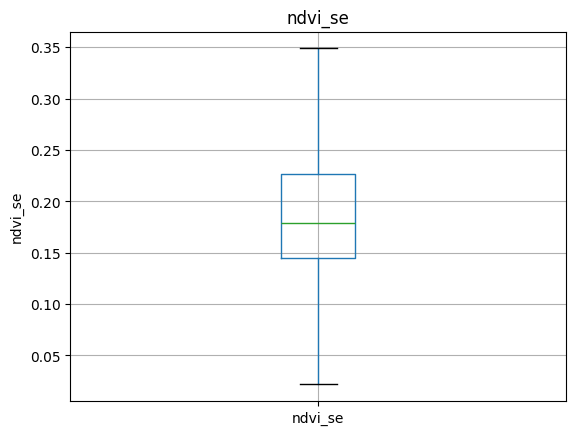

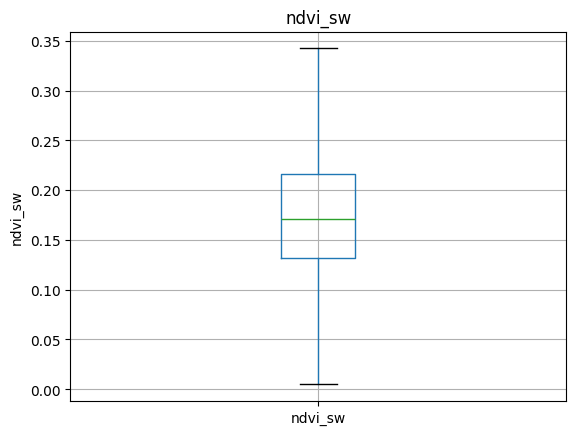

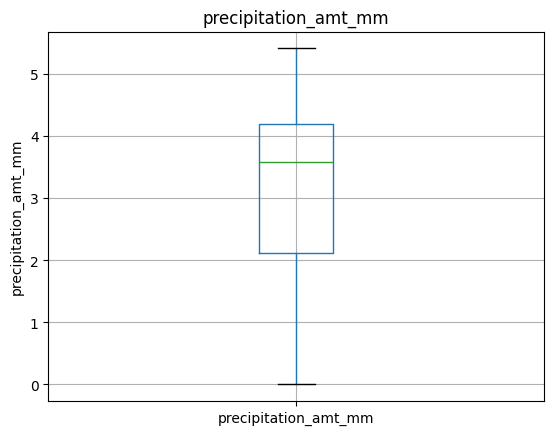

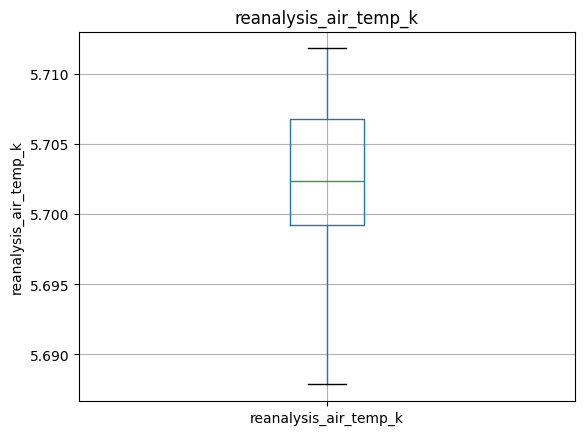

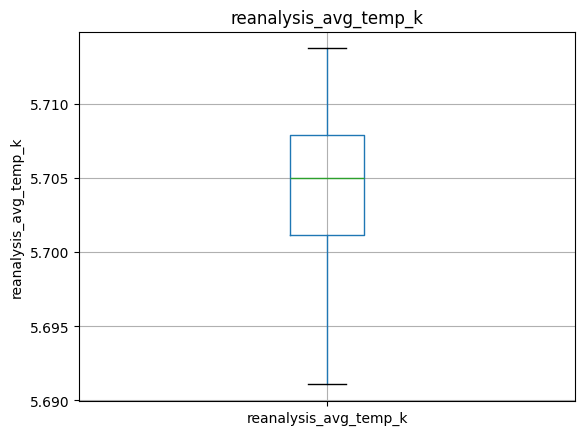

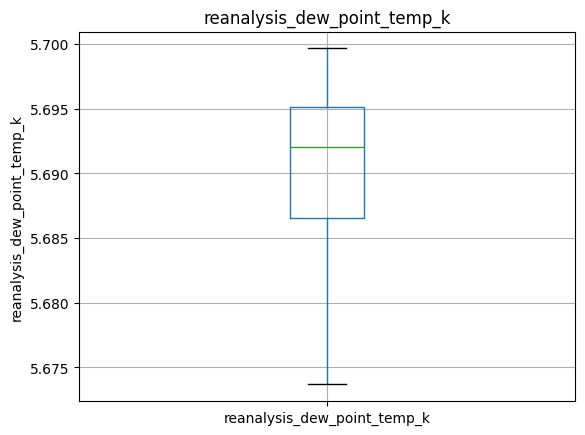

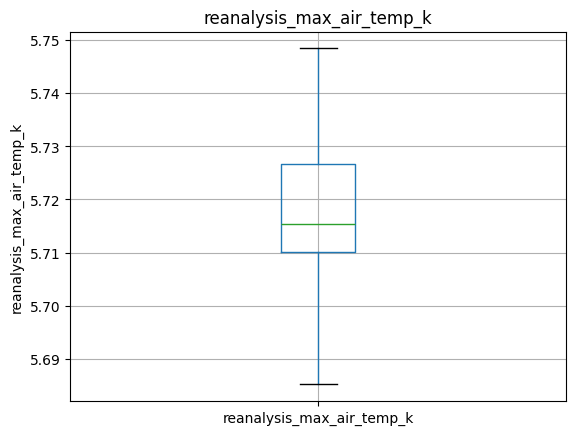

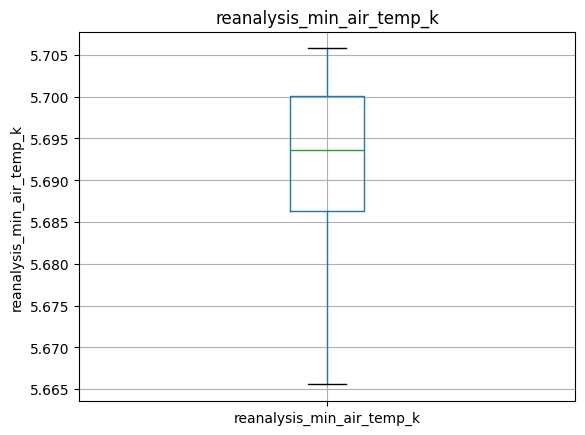

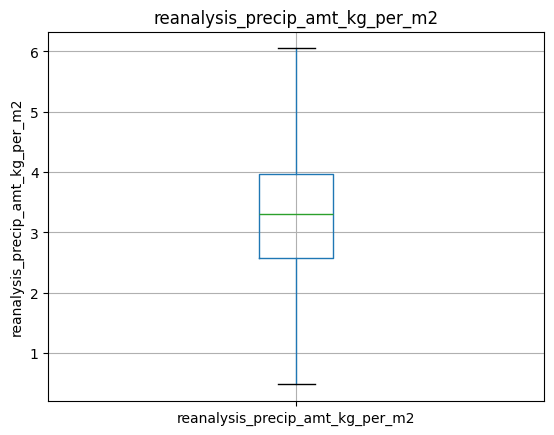

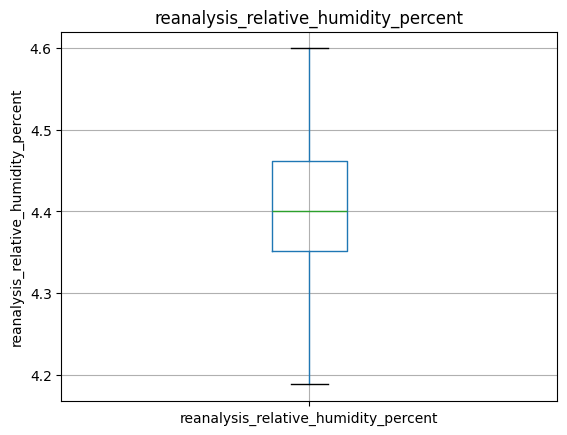

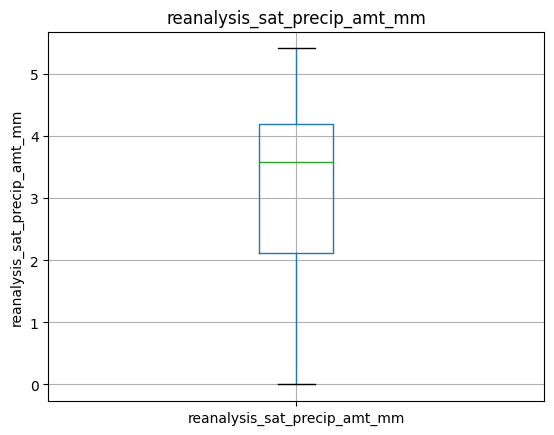

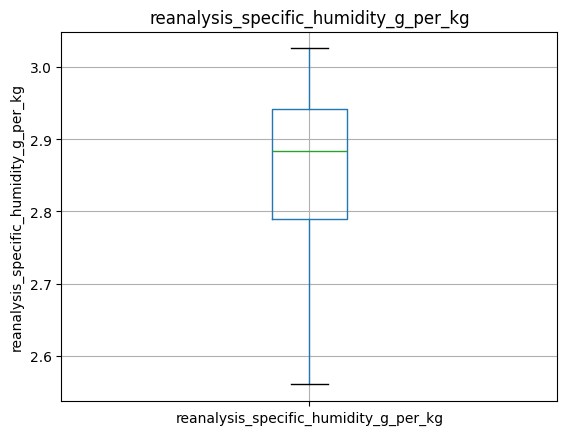

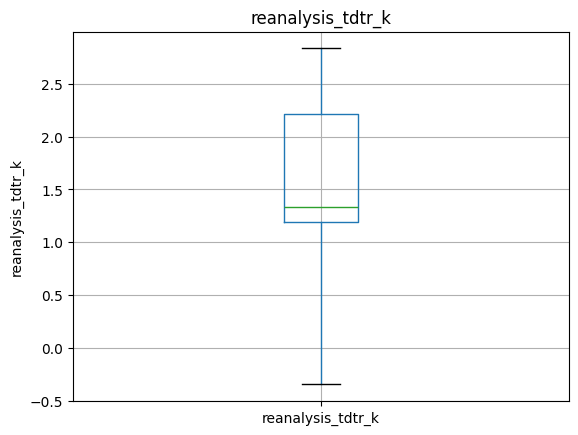

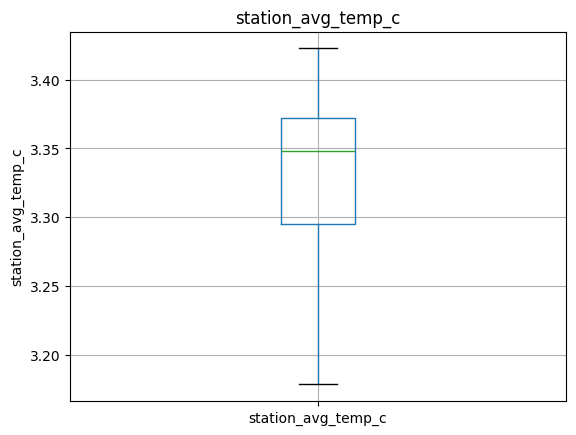

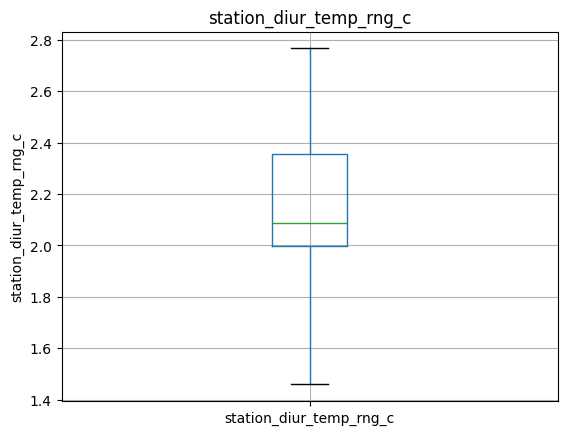

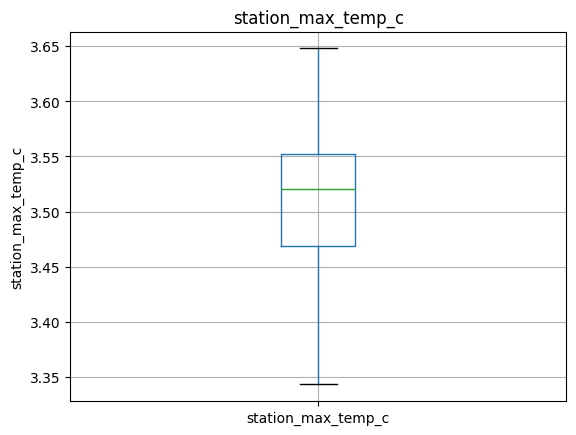

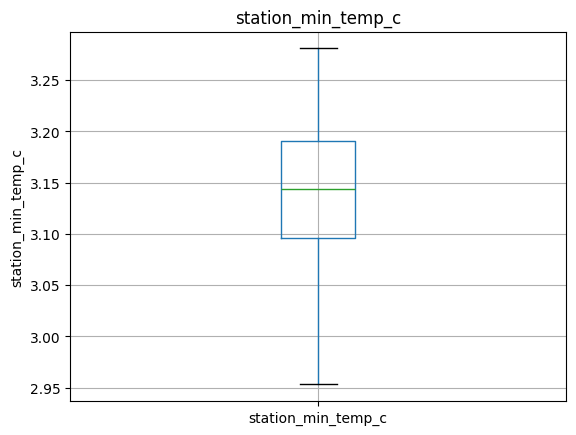

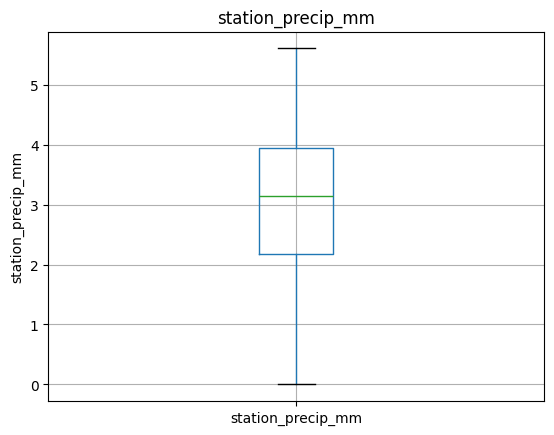

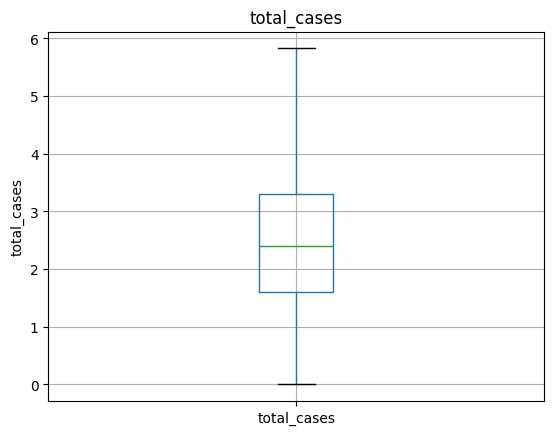

In [77]:
for feature in numerical_features:
    data=test_data.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

#### 4. HANDLING CATEGORICAL VARIABLES

In [78]:
# Replacing 'sj' with 0 and 'iq' with 1
test_data['city'] = test_data['city'].map({'sj': 0, 'iq': 1})

In [79]:
test_data.head()

city  year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
511     0  2000           8 -0.047738  0.188552  0.140420  0.137077   
961     1  2000          51  0.235083  0.156198  0.210963  0.264088   
231     0  1994          40 -0.047738 -0.050609  0.021765  0.004890   
687     0  2003          29 -0.058424 -0.119535  0.202836  0.171345   
34      0  1990          52  0.264285  0.244696  0.158086  0.149817   

     precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
511              2.159869               5.697391               5.697836   
961              1.589235               5.708476               5.713733   
231              0.488580               5.708362               5.708770   
687              4.152142               5.707623               5.708249   
34               0.000000               5.700573               5.700730   

     reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
511                     5.680767                   5.703449   
961                     5.677072                   5.743644   
231                     5.691585                   5.715382   
687                     5.694795                   5.712742   
34                      5.680533                   5.706446   

     reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
511                   5.691372                         2.667922   
961                   5.689007                         1.902108   
231                   5.702782                         1.335001   
687                   5.701780                         3.131137   
34                    5.691372                         1.865629   

     reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
511                              4.318345                      2.159869   
961                              4.188405                      1.589235   
231                              4.319049                      0.488580   
687                              4.391287                      4.152142   
34                               4.258183                      0.000000   

     reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
511                               2.685805           1.093839   
961                               2.652437           2.639057   
231                               2.876064           1.288839   
687                               2.929821           1.069625   
34                                2.686681           1.189584   

     station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
511            3.249266                 2.031901            3.377588   
961            3.374169                 2.586510            3.583519   
231            3.391628                 2.066863            3.566712   
687            3.348901                 1.929449            3.487375   
34             3.264122                 1.923205            3.397858   

     station_min_temp_c  station_precip_mm  total_cases  start_month  \
511            3.072693           1.568616     1.609438            2   
961            3.091042           0.000000     0.000000           12   
231            3.234749           2.219203     5.825435           10   
687            3.122365           3.784190     3.258097            7   
34             3.095578           3.086487     3.332205           12   

     start_date  
511          26  
961          23  
231           8  
687          16  
34           24

In [80]:
## Using the Ordinal Encoder computed in Train Data to directly transform our test data
encoded_years = ordinal_encoder.transform(test_data[['year']])

test_data['year'] = encoded_years

In [81]:
test_data.year.unique()

array([10.,  4., 13.,  0.,  6., 18., 12.,  1., 16.,  3.,  7., 20.,  8.,
       17., 14.,  9., 19.,  2., 15., 11.,  5.])

In [82]:
test_data.head()

city  year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
511     0  10.0           8 -0.047738  0.188552  0.140420  0.137077   
961     1  10.0          51  0.235083  0.156198  0.210963  0.264088   
231     0   4.0          40 -0.047738 -0.050609  0.021765  0.004890   
687     0  13.0          29 -0.058424 -0.119535  0.202836  0.171345   
34      0   0.0          52  0.264285  0.244696  0.158086  0.149817   

     precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
511              2.159869               5.697391               5.697836   
961              1.589235               5.708476               5.713733   
231              0.488580               5.708362               5.708770   
687              4.152142               5.707623               5.708249   
34               0.000000               5.700573               5.700730   

     reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
511                     5.680767                   5.703449   
961                     5.677072                   5.743644   
231                     5.691585                   5.715382   
687                     5.694795                   5.712742   
34                      5.680533                   5.706446   

     reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
511                   5.691372                         2.667922   
961                   5.689007                         1.902108   
231                   5.702782                         1.335001   
687                   5.701780                         3.131137   
34                    5.691372                         1.865629   

     reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
511                              4.318345                      2.159869   
961                              4.188405                      1.589235   
231                              4.319049                      0.488580   
687                              4.391287                      4.152142   
34                               4.258183                      0.000000   

     reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
511                               2.685805           1.093839   
961                               2.652437           2.639057   
231                               2.876064           1.288839   
687                               2.929821           1.069625   
34                                2.686681           1.189584   

     station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
511            3.249266                 2.031901            3.377588   
961            3.374169                 2.586510            3.583519   
231            3.391628                 2.066863            3.566712   
687            3.348901                 1.929449            3.487375   
34             3.264122                 1.923205            3.397858   

     station_min_temp_c  station_precip_mm  total_cases  start_month  \
511            3.072693           1.568616     1.609438            2   
961            3.091042           0.000000     0.000000           12   
231            3.234749           2.219203     5.825435           10   
687            3.122365           3.784190     3.258097            7   
34             3.095578           3.086487     3.332205           12   

     start_date  
511          26  
961          23  
231           8  
687          16  
34           24

#### 5. FEATURE SCALING

In [83]:
scale_features = []
for feature in test_data.columns:
    if feature != "total_cases":
        scale_features.append(feature)

In [84]:
## Using standard_scaler computed in our training data to directly encode our test data
test_data[scale_features] = standard_scaler.transform(test_data[scale_features])

In [85]:
test_data.head()

city      year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
511 -0.744360 -0.211464   -1.232933 -1.550088  0.684588 -0.727791 -0.675095   
961  1.343436 -0.211464    1.638003  0.968665  0.373894  0.477792  1.224239   
231 -0.744360 -1.331150    0.903577 -1.550088 -1.612028 -2.755614 -2.651835   
687 -0.744360  0.348379    0.169152 -1.645255 -2.273910  0.338898 -0.162653   
34  -0.744360 -2.077607    1.704769  1.228733  1.223730 -0.425883 -0.484576   

     precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
511             -0.597434              -1.197572              -1.622017   
961             -0.955467               1.258417               2.219583   
231             -1.646052               1.233214               1.020263   
687              0.652580               1.069326               0.894275   
34              -1.952602              -0.492625              -0.922659   

     reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
511                    -2.101676                  -1.437960   
961                    -2.838124                   2.459789   
231                     0.054020                  -0.280849   
687                     0.693717                  -0.536794   
34                     -2.148292                  -1.147385   

     reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
511                  -0.171455                        -0.599677   
961                  -0.446470                        -1.357815   
231                   1.155160                        -1.919238   
687                   1.038712                        -0.141105   
34                   -0.171455                        -1.393928   

     reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
511                             -1.198329                     -0.597434   
961                             -2.750458                     -0.955467   
231                             -1.189921                     -1.646052   
687                             -0.327036                      0.652580   
34                              -1.916963                     -1.952602   

     reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
511                              -2.163120          -0.995784   
961                              -2.545554           1.936990   
231                               0.017471          -0.625680   
687                               0.633599          -1.041742   
34                               -2.153080          -0.814063   

     station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
511           -1.997265                -0.667805           -2.283274   
961            0.793854                 1.880521            1.293044   
231            1.184006                -0.507161            1.001162   
687            0.229213                -1.138551           -0.376643   
34            -1.665290                -1.167239           -1.931237   

     station_min_temp_c  station_precip_mm  total_cases  start_month  \
511           -0.968826          -1.184659     1.609438    -1.279364   
961           -0.697332          -2.427034     0.000000     1.630327   
231            1.428949          -0.669381     5.825435     1.048388   
687           -0.233886           0.570119     3.258097     0.175481   
34            -0.630230           0.017524     3.332205     1.630327   

     start_date  
511    1.213774  
961    0.871296  
231   -0.841089  
687    0.072183  
34     0.985455

### FEATURE SELECTION

In [86]:
### Capturing the Training Features
X_train=train_data.drop(['total_cases'],axis=1)

### Capturing the training label
y_train = train_data[['total_cases']]

In [87]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train,y_train)
mutual_info

array([0.17439513, 0.40927662, 0.12318383, 0.10309121, 0.12938773,
       0.10097379, 0.11707238, 0.01422843, 0.07242094, 0.04969472,
       0.0258522 , 0.16665867, 0.21869195, 0.05448277, 0.08601771,
       0.01405209, 0.02653057, 0.18966081, 0.04448506, 0.16335858,
       0.13753947, 0.19369515, 0.02347701, 0.16596805, 0.        ])

In [88]:
mutual_info=pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

year                                     0.409277
reanalysis_min_air_temp_k                0.218692
station_min_temp_c                       0.193695
reanalysis_tdtr_k                        0.189661
city                                     0.174395
reanalysis_max_air_temp_k                0.166659
start_month                              0.165968
station_diur_temp_rng_c                  0.163359
station_max_temp_c                       0.137539
ndvi_nw                                  0.129388
weekofyear                               0.123184
ndvi_sw                                  0.117072
ndvi_ne                                  0.103091
ndvi_se                                  0.100974
reanalysis_relative_humidity_percent     0.086018
reanalysis_air_temp_k                    0.072421
reanalysis_precip_amt_kg_per_m2          0.054483
reanalysis_avg_temp_k                    0.049695
station_avg_temp_c                       0.044485
reanalysis_specific_humidity_g_per_kg    0.026531


In [89]:
from sklearn.feature_selection import SelectKBest

In [90]:
sel_five_cols = SelectKBest(mutual_info_regression,k=15)
sel_five_cols.fit(X_train,y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c',
       'start_month'],
      dtype='object')

In [91]:
selected_feat=['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c',
       'start_month']

In [92]:
X_train=X_train[selected_feat]

In [93]:
### Capturing the Training Features
X_test=test_data.drop(['total_cases'],axis=1)

### Capturing the training label
y_test = test_data[['total_cases']]

In [94]:
X_test=X_test[selected_feat]

### TRAINING THE MODEL

In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [96]:
from xgboost import XGBRegressor
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train)
y_pred_xgboost = xgboost.predict(X_test)

In [97]:
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)
r2_xgboost = r2_score(y_test, y_pred_xgboost)

In [98]:
print("XGBoost Regression:")
print("Mean Squared Error:", mse_xgboost)
print("Mean Absolute Error:", mae_xgboost)
print("R-squared:", r2_xgboost)

XGBoost Regression:
Mean Squared Error: 0.3640246374770637
Mean Absolute Error: 0.46256658976367376
R-squared: 0.7742552387090347


In [99]:
from sklearn.ensemble import GradientBoostingRegressor
# Initialize the model
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gb_reg.fit(X_train, y_train)

# Predictions
y_pred = gb_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')
r2_score = r2_score(y_test, y_pred)
print("R-squared:", r2_score)

RMSE: 0.6744366473856398
R-squared: 0.717921994369251


In [100]:
from sklearn.ensemble import RandomForestRegressor
ran_reg = RandomForestRegressor()
ran_reg.fit(X_train, y_train)
y_pred_xgboost = ran_reg.predict(X_test)

In [101]:
from sklearn.metrics import r2_score

# Assuming y_test contains the true target values and y_pred_xgboost contains the predicted values

# Calculate R-squared score
r2_value = r2_score(y_test, y_pred_xgboost)

# Print the R-squared score
print("R-squared:", r2_value)


R-squared: 0.7750027113136193


### HYPERPARAMETER TUNING

In [102]:
from sklearn.model_selection import GridSearchCV
# Random Forest parameters
rf_params = {
    'n_estimators': [50, 100,300,500],
    'max_depth': [None, 5, 10,20,30,40,50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': [50, 100,300,500],
    'learning_rate': [0.01, 0.05,0.1,0.2,0.3,0.4],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# XGBoost parameters
xgb_params = {
    'n_estimators': [50, 100,300,500],
    'learning_rate': [0.01, 0.03,0.05,0.07, 0.1],
    'max_depth': [3, 5,7,10,11,13,15],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


In [103]:
from sklearn.metrics import r2_score

def perform_grid_search(estimator, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best parameters and best score
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score (MSE): {abs(grid_search.best_score_)}")

    # Test set evaluation
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Test MSE: {mse}")
    print(f"Test R²: {r2}")


In [104]:
print("Random Forest Regressor:")
perform_grid_search(RandomForestRegressor(random_state=42), rf_params, X_train, y_train, X_test, y_test)

print("\nGradient Boosting Regressor:")
perform_grid_search(GradientBoostingRegressor(random_state=42), gb_params, X_train, y_train, X_test, y_test)

Random Forest Regressor:
Fitting 5 folds for each of 504 candidates, totalling 2520 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best score (MSE): 0.5496230562646678
Test MSE: 0.5678619089769578
Test R²: 0.6478484204346959

Gradient Boosting Regressor:
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best score (MSE): 0.36738292950587936
Test MSE: 0.32409271930847905
Test R²: 0.7990184563784033


In [105]:
import optuna
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Define the objective function to maximize R-squared score and minimize MSE
def objective(trial):
    # Define search space for hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10)
    }
    
    # Initialize XGBoost Regressor with current hyperparameters
    model = xgb.XGBRegressor(**params)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_pred = model.predict(X_test)
    
    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    return r2  # Optimize for R-squared score

# Define Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=250)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate R-squared score and MSE on the test set
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared score on test set:", r2)
print("Mean Squared Error on test set:", mse)

[I 2024-04-04 22:38:58,002] A new study created in memory with name: no-name-5e79c813-39a6-4812-8f51-3c32c063d825
[I 2024-04-04 22:38:58,360] Trial 0 finished with value: 0.6983262689531299 and parameters: {'n_estimators': 235, 'learning_rate': 0.019629432841269237, 'max_depth': 10, 'subsample': 0.6182430619289547, 'colsample_bytree': 0.5374188726359657, 'gamma': 1.5535974281182456, 'reg_alpha': 2.5604305878973435, 'reg_lambda': 0.13864756833984138}. Best is trial 0 with value: 0.6983262689531299.
[I 2024-04-04 22:38:58,512] Trial 1 finished with value: 0.6242169834676992 and parameters: {'n_estimators': 235, 'learning_rate': 0.04445813199973554, 'max_depth': 4, 'subsample': 0.7454471133916175, 'colsample_bytree': 0.8042048314975703, 'gamma': 3.9183534010712577, 'reg_alpha': 7.205828073971816, 'reg_lambda': 3.1705811138631823}. Best is trial 0 with value: 0.6983262689531299.
[I 2024-04-04 22:38:59,074] Trial 2 finished with value: 0.6645464503209927 and parameters: {'n_estimators': 344

Best hyperparameters: {'n_estimators': 493, 'learning_rate': 0.018556010554813245, 'max_depth': 6, 'subsample': 0.9992241468067248, 'colsample_bytree': 0.9880418623610806, 'gamma': 0.07377476302043964, 'reg_alpha': 0.2178450748141906, 'reg_lambda': 2.082779531405314}
R-squared score on test set: 0.8107976489670032
Mean Squared Error on test set: 0.3050981863354155


Best hyperparameters: {'n_estimators': 493, 'learning_rate': 0.018556010554813245, 'max_depth': 6, 'subsample': 0.9992241468067248, 'colsample_bytree': 0.9880418623610806, 'gamma': 0.07377476302043964, 'reg_alpha': 0.2178450748141906, 'reg_lambda': 2.082779531405314}
R-squared score on test set: 0.8112033560663294
Mean Squared Error on test set: 0.3044439634913968

In [106]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Define the hyperparameters
hyperparameters = {
    'n_estimators': 493,
    'learning_rate': 0.018556010554813245, 
    'max_depth': 6, 
    'subsample': 0.9992241468067248, 
    'colsample_bytree': 0.9880418623610806, 
    'gamma': 0.07377476302043964, 
    'reg_alpha': 0.2178450748141906, 
    'reg_lambda': 2.082779531405314
}

# Initialize XGBoost regressor with the hyperparameters
final_model = xgb.XGBRegressor(**hyperparameters)

# Train the model
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Calculate MAE, MSE, and R-squared score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)


Mean Absolute Error (MAE): 0.43368122593049324
Mean Squared Error (MSE): 0.3050981863354155
R-squared Score: 0.8107976489670032


### SAVING THE BEST FIT MODEL

In [108]:
import joblib
 
joblib.dump(final_model, "best_fit_model.pkl")

['best_fit_model.pkl']

### Applying the Best Fit Model to our Testing Dataset

In [109]:
# Load the saved model
loaded_model = joblib.load("best_fit_model.pkl")

### PREPARING THE TEST DATASET FOR PREDICTION

In [145]:
X_test = testing_dataset.copy()

In [146]:
X_test.head()

city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  2008          18      2008-04-29  -0.0189 -0.018900  0.102729   
1   sj  2008          19      2008-05-06  -0.0180 -0.012400  0.082043   
2   sj  2008          20      2008-05-13  -0.0015       NaN  0.151083   
3   sj  2008          21      2008-05-20      NaN -0.019867  0.124329   
4   sj  2008          22      2008-05-27   0.0568  0.039833  0.062267   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0  0.091200                 78.60             298.492857   
1  0.072314                 12.56             298.475714   
2  0.091529                  3.66             299.455714   
3  0.125686                  0.00             299.690000   
4  0.075914                  0.76             299.780000   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0             298.550000                   294.527143   
1             298.557143                   294.395714   
2             299.357143                   295.308571   
3             299.728571                   294.402857   
4             299.671429                   294.760000   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      301.1                      296.4   
1                      300.8                      296.7   
2                      302.2                      296.4   
3                      303.0                      296.9   
4                      302.3                      297.3   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            25.37                             78.781429   
1                            21.83                             78.230000   
2                             4.12                             78.270000   
3                             2.20                             73.015714   
4                             4.36                             74.084286   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         78.60                              15.918571   
1                         12.56                              15.791429   
2                          3.66                              16.674286   
3                          0.00                              15.775714   
4                          0.76                              16.137143   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           3.128571           26.528571                 7.057143   
1           2.571429           26.071429                 5.557143   
2           4.428571           27.928571                 7.785714   
3           4.342857           28.057143                 6.271429   
4           3.542857           27.614286                 7.085714   

   station_max_temp_c  station_min_temp_c  station_precip_mm  start_year  \
0                33.3                21.7               75.2        2008   
1                30.0                22.2               34.3        2008   
2                32.8                22.8                3.0        2008   
3                33.3                24.4                0.3        2008   
4                33.3                23.3               84.1        2008   

   start_month  start_date  
0            4          29  
1            5           6  
2            5          13  
3            5          20  
4            5          27

#### 1. HANDLING THE MISSING VALUES

In [147]:
features_nan=[feature for feature in X_test.columns if X_test[feature].isnull().sum()>=1 ]

for feature in features_nan:
    print("{}: {} missing values".format(feature,X_test[feature].isnull().sum()))

ndvi_ne: 43 missing values
ndvi_nw: 11 missing values
ndvi_se: 1 missing values
ndvi_sw: 1 missing values
precipitation_amt_mm: 2 missing values
reanalysis_air_temp_k: 2 missing values
reanalysis_avg_temp_k: 2 missing values
reanalysis_dew_point_temp_k: 2 missing values
reanalysis_max_air_temp_k: 2 missing values
reanalysis_min_air_temp_k: 2 missing values
reanalysis_precip_amt_kg_per_m2: 2 missing values
reanalysis_relative_humidity_percent: 2 missing values
reanalysis_sat_precip_amt_mm: 2 missing values
reanalysis_specific_humidity_g_per_kg: 2 missing values
reanalysis_tdtr_k: 2 missing values
station_avg_temp_c: 12 missing values
station_diur_temp_rng_c: 12 missing values
station_max_temp_c: 3 missing values
station_min_temp_c: 9 missing values
station_precip_mm: 5 missing values


In [148]:
## Replacing the Missing Values
for feature in features_nan:
    ## We will replace by using median since there are outliers
    median_value=X_test[feature].median()
    X_test[feature].fillna(median_value,inplace=True)
    
X_test[features_nan].isnull().sum() 

ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

#### 2. DROPPING UNNECESSARY COLUMNS

In [149]:
X_test.drop(['start_year','week_start_date'], axis = 1, inplace = True)

In [150]:
X_test.head()

city  year  weekofyear  ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0   sj  2008          18  -0.0189 -0.018900  0.102729  0.091200   
1   sj  2008          19  -0.0180 -0.012400  0.082043  0.072314   
2   sj  2008          20  -0.0015  0.088700  0.151083  0.091529   
3   sj  2008          21   0.1101 -0.019867  0.124329  0.125686   
4   sj  2008          22   0.0568  0.039833  0.062267  0.075914   

   precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
0                 78.60             298.492857             298.550000   
1                 12.56             298.475714             298.557143   
2                  3.66             299.455714             299.357143   
3                  0.00             299.690000             299.728571   
4                  0.76             299.780000             299.671429   

   reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
0                   294.527143                      301.1   
1                   294.395714                      300.8   
2                   295.308571                      302.2   
3                   294.402857                      303.0   
4                   294.760000                      302.3   

   reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
0                      296.4                            25.37   
1                      296.7                            21.83   
2                      296.4                             4.12   
3                      296.9                             2.20   
4                      297.3                             4.36   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             78.781429                         78.60   
1                             78.230000                         12.56   
2                             78.270000                          3.66   
3                             73.015714                          0.00   
4                             74.084286                          0.76   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                              15.918571           3.128571   
1                              15.791429           2.571429   
2                              16.674286           4.428571   
3                              15.775714           4.342857   
4                              16.137143           3.542857   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0           26.528571                 7.057143                33.3   
1           26.071429                 5.557143                30.0   
2           27.928571                 7.785714                32.8   
3           28.057143                 6.271429                33.3   
4           27.614286                 7.085714                33.3   

   station_min_temp_c  station_precip_mm  start_month  start_date  
0                21.7               75.2            4          29  
1                22.2               34.3            5           6  
2                22.8                3.0            5          13  
3                24.4                0.3            5          20  
4                23.3               84.1            5          27

#### 3. HANDLING OUTLIERS

In [151]:
numerical_features = [feature for feature in X_test.columns if X_test[feature].dtypes != "O" and feature not in non_numerical_variables ]

print("Total count of Numerical Variables :",len(numerical_features))
X_test[numerical_features].head()

Total count of Numerical Variables : 20


ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
0  -0.0189 -0.018900  0.102729  0.091200                 78.60   
1  -0.0180 -0.012400  0.082043  0.072314                 12.56   
2  -0.0015  0.088700  0.151083  0.091529                  3.66   
3   0.1101 -0.019867  0.124329  0.125686                  0.00   
4   0.0568  0.039833  0.062267  0.075914                  0.76   

   reanalysis_air_temp_k  reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0             298.492857             298.550000                   294.527143   
1             298.475714             298.557143                   294.395714   
2             299.455714             299.357143                   295.308571   
3             299.690000             299.728571                   294.402857   
4             299.780000             299.671429                   294.760000   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      301.1                      296.4   
1                      300.8                      296.7   
2                      302.2                      296.4   
3                      303.0                      296.9   
4                      302.3                      297.3   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            25.37                             78.781429   
1                            21.83                             78.230000   
2                             4.12                             78.270000   
3                             2.20                             73.015714   
4                             4.36                             74.084286   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         78.60                              15.918571   
1                         12.56                              15.791429   
2                          3.66                              16.674286   
3                          0.00                              15.775714   
4                          0.76                              16.137143   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           3.128571           26.528571                 7.057143   
1           2.571429           26.071429                 5.557143   
2           4.428571           27.928571                 7.785714   
3           4.342857           28.057143                 6.271429   
4           3.542857           27.614286                 7.085714   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                33.3                21.7               75.2  
1                30.0                22.2               34.3  
2                32.8                22.8                3.0  
3                33.3                24.4                0.3  
4                33.3                23.3               84.1

In [152]:
for feature in numerical_features:
    X_test[feature]=np.log(X_test[feature] + 1)

In [153]:
for feature in numerical_features :
    IQR = X_test[feature].quantile(0.75) - X_test[feature].quantile(0.25)

    lower_bridge =X_test[feature].quantile(0.25)-(1.5*IQR)
    upper_bridge = X_test[feature].quantile(0.75)+(1.5*IQR)
    
    #Replacing values above the upper boundary with the upper boundary
    X_test.loc[X_test[feature] >= upper_bridge, feature] = upper_bridge# Replacing values below the lower boundary with the lower boundary
    X_test.loc[X_test[feature] <= lower_bridge, feature] = lower_bridge

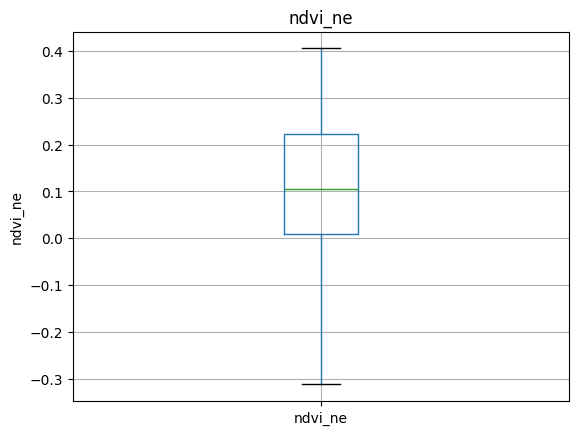

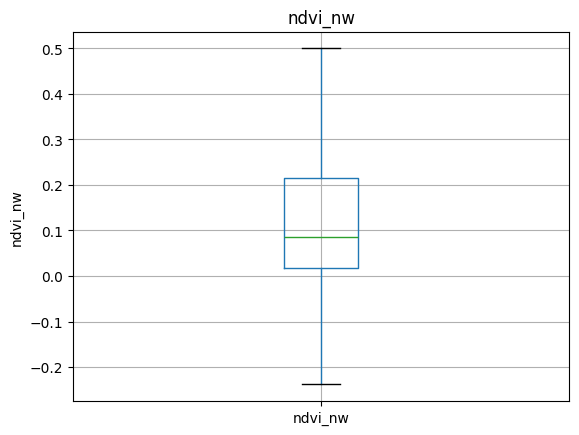

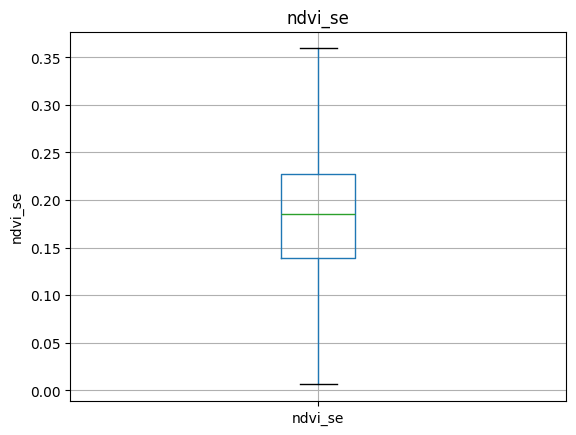

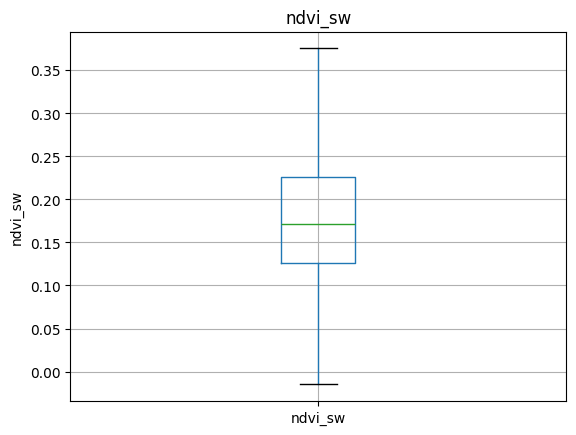

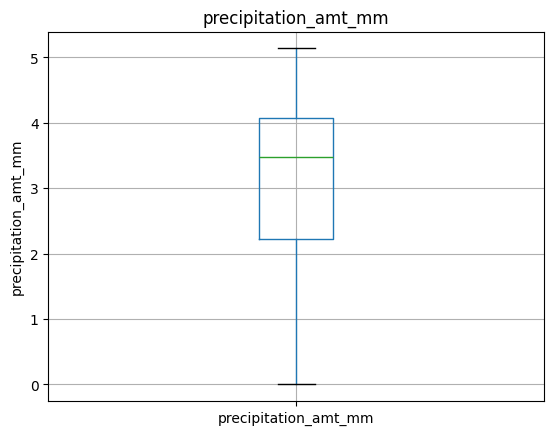

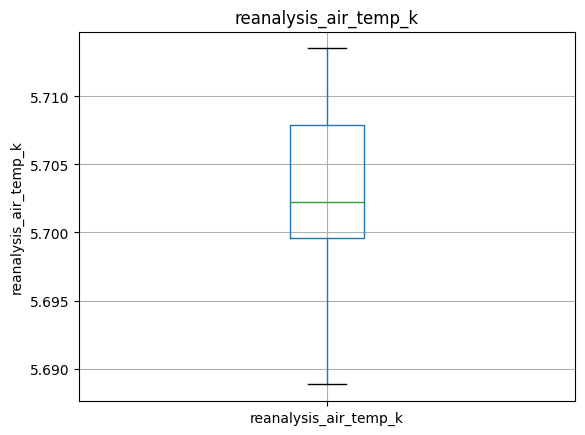

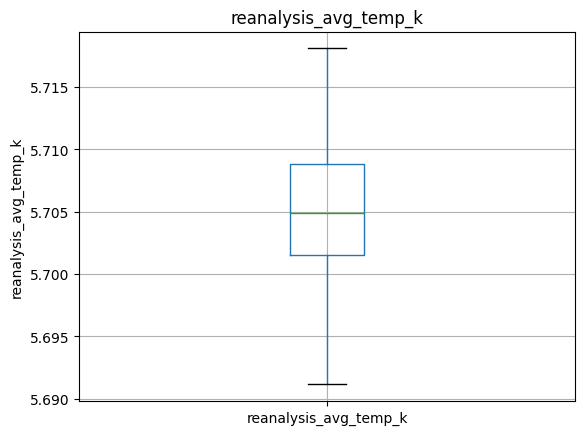

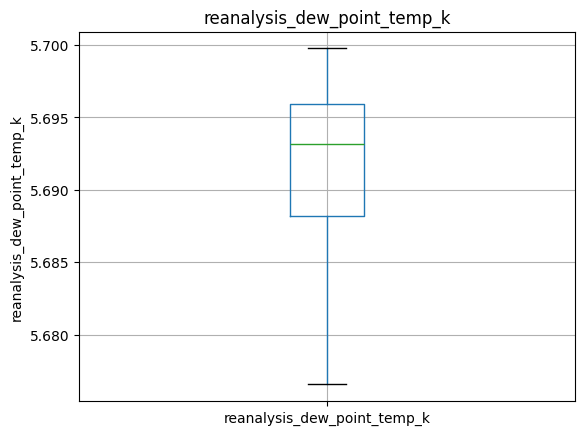

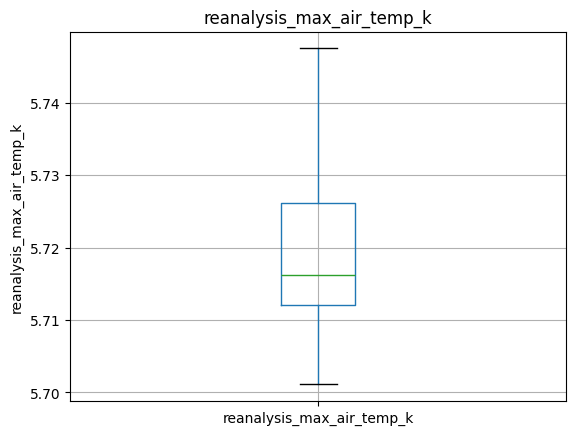

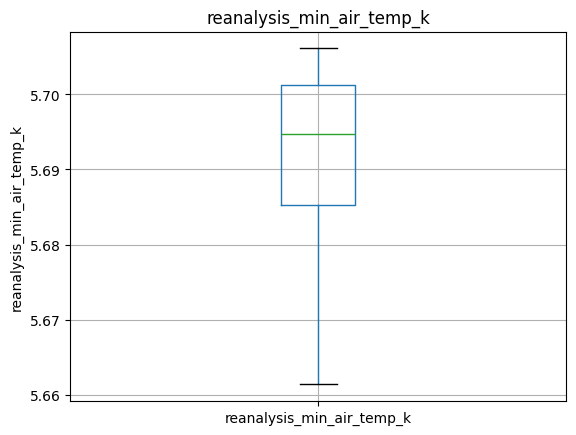

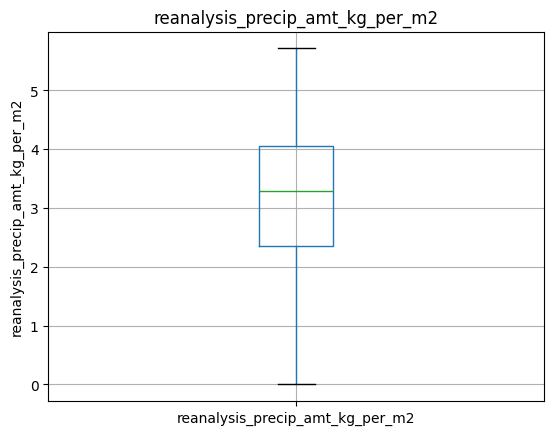

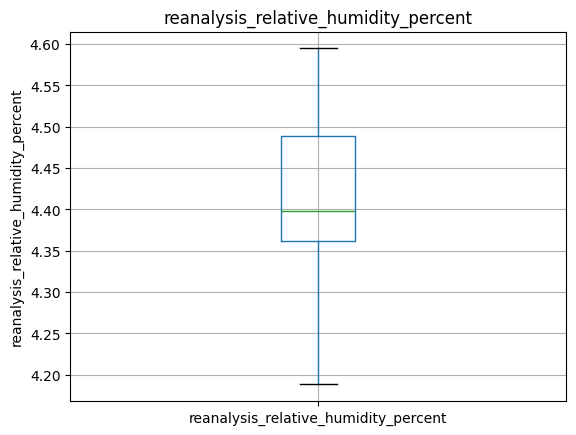

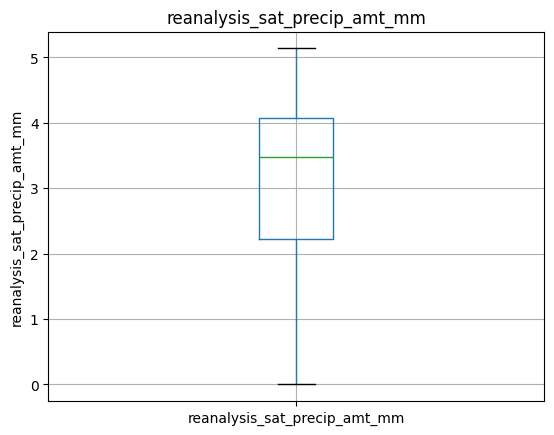

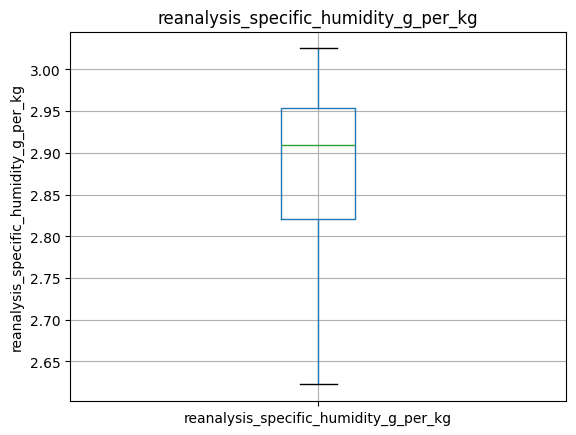

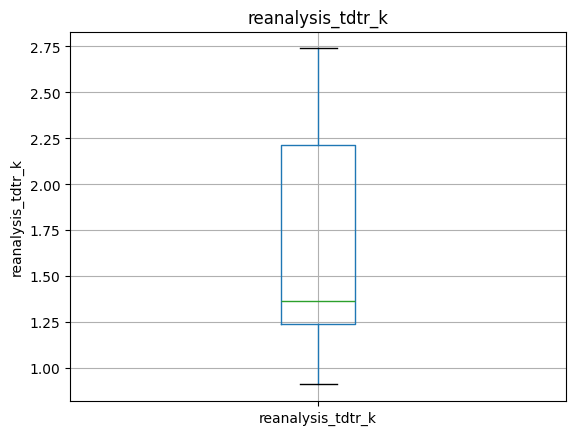

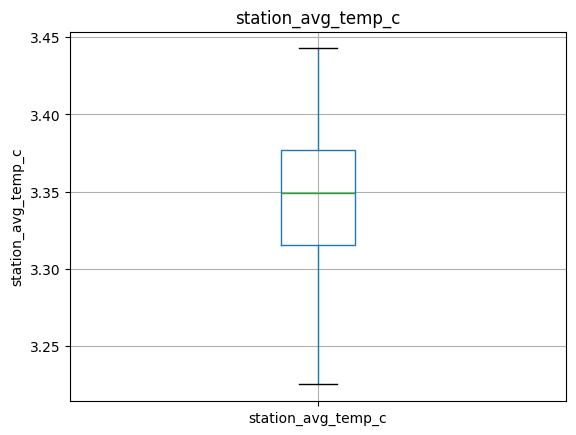

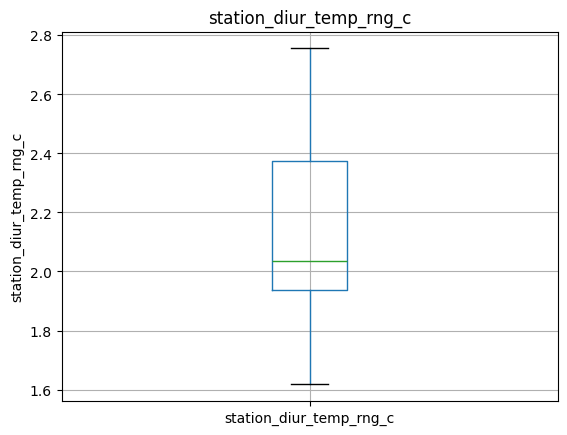

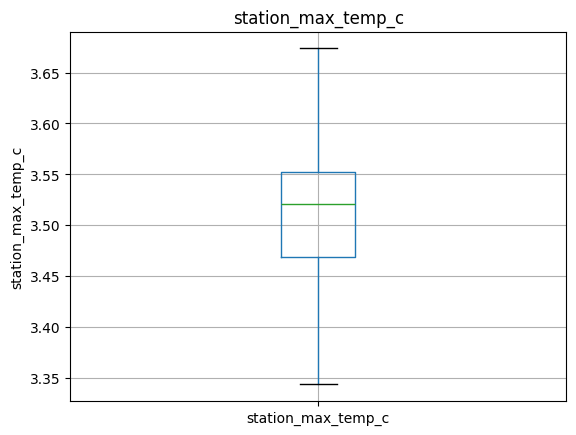

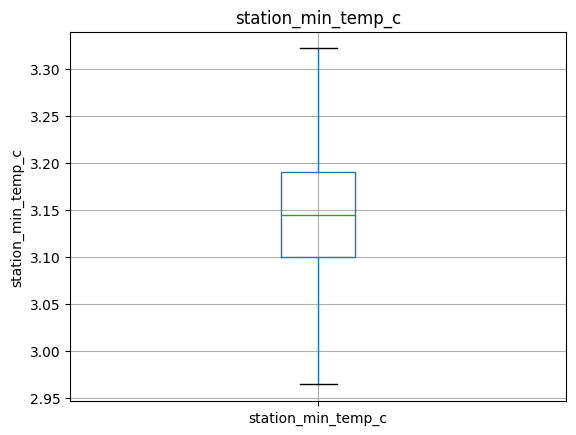

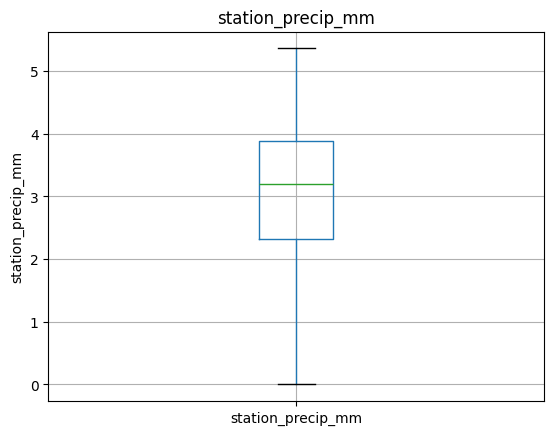

In [154]:
for feature in numerical_features:
    data=X_test.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

#### 4. HANDLING CATEGORICAL VARIABLES

In [155]:
# Replacing 'sj' with 0 and 'iq' with 1
X_test['city'] = X_test['city'].map({'sj': 0, 'iq': 1})

In [156]:
X_test.head()

city  year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0     0  2008          18 -0.019081 -0.019081  0.097788  0.087278   
1     0  2008          19 -0.018164 -0.012478  0.078851  0.069819   
2     0  2008          20 -0.001501  0.084984  0.140703  0.087579   
3     0  2008          21  0.104450 -0.020067  0.117186  0.118392   
4     0  2008          22  0.055245  0.039060  0.060405  0.073171   

   precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
0              4.377014               5.702091               5.702281   
1              2.607124               5.702033               5.702305   
2              1.539015               5.705300               5.704972   
3              0.000000               5.706080               5.706208   
4              0.565314               5.706379               5.706018   

   reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
0                     5.688761                   5.710758   
1                     5.688316                   5.709765   
2                     5.691401                   5.714393   
3                     5.688340                   5.717028   
4                     5.689548                   5.714722   

   reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
0                   5.695078                         3.272227   
1                   5.696086                         3.128075   
2                   5.695078                         1.633154   
3                   5.696758                         1.163151   
4                   5.698100                         1.678964   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                              4.379291                      4.377014   
1                              4.372355                      2.607124   
2                              4.372860                      1.539015   
3                              4.304277                      0.000000   
4                              4.318611                      0.565314   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                               2.828412           1.417931   
1                               2.820869           1.272966   
2                               2.872111           1.691676   
3                               2.819932           1.675761   
4                               2.841248           1.513556   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0            3.315224                 2.086559            3.535145   
1            3.298479                 1.880555            3.433987   
2            3.364830                 2.173127            3.520461   
3            3.369264                 1.983953            3.535145   
4            3.353906                 2.090099            3.535145   

   station_min_temp_c  station_precip_mm  start_month  start_date  
0            3.122365           4.333361            4          29  
1            3.144152           3.563883            5           6  
2            3.169686           1.386294            5          13  
3            3.234749           0.262364            5          20  
4            3.190476           4.443827            5          27

#### 5. HANDLING TEMPORAL VARIABLES

In [157]:
year_mapping = {2008: 18,2009: 19,2010: 20,2021: 21,2022: 22,2023: 23}

# Apply the mapping to the 'year' column
X_test['year'] = X_test['year'].map(year_mapping)

In [158]:
X_test.head()

city  year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0     0  18.0          18 -0.019081 -0.019081  0.097788  0.087278   
1     0  18.0          19 -0.018164 -0.012478  0.078851  0.069819   
2     0  18.0          20 -0.001501  0.084984  0.140703  0.087579   
3     0  18.0          21  0.104450 -0.020067  0.117186  0.118392   
4     0  18.0          22  0.055245  0.039060  0.060405  0.073171   

   precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
0              4.377014               5.702091               5.702281   
1              2.607124               5.702033               5.702305   
2              1.539015               5.705300               5.704972   
3              0.000000               5.706080               5.706208   
4              0.565314               5.706379               5.706018   

   reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
0                     5.688761                   5.710758   
1                     5.688316                   5.709765   
2                     5.691401                   5.714393   
3                     5.688340                   5.717028   
4                     5.689548                   5.714722   

   reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
0                   5.695078                         3.272227   
1                   5.696086                         3.128075   
2                   5.695078                         1.633154   
3                   5.696758                         1.163151   
4                   5.698100                         1.678964   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                              4.379291                      4.377014   
1                              4.372355                      2.607124   
2                              4.372860                      1.539015   
3                              4.304277                      0.000000   
4                              4.318611                      0.565314   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                               2.828412           1.417931   
1                               2.820869           1.272966   
2                               2.872111           1.691676   
3                               2.819932           1.675761   
4                               2.841248           1.513556   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0            3.315224                 2.086559            3.535145   
1            3.298479                 1.880555            3.433987   
2            3.364830                 2.173127            3.520461   
3            3.369264                 1.983953            3.535145   
4            3.353906                 2.090099            3.535145   

   station_min_temp_c  station_precip_mm  start_month  start_date  
0            3.122365           4.333361            4          29  
1            3.144152           3.563883            5           6  
2            3.169686           1.386294            5          13  
3            3.234749           0.262364            5          20  
4            3.190476           4.443827            5          27

#### 6. FEATURE SCALING

In [159]:
## Using standard_scaler computed in our training data to directly encode our test data
X_test[scale_features] = standard_scaler.transform(X_test[scale_features])

In [160]:
X_test.head()

city     year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0 -0.74436  1.28145   -0.565274 -1.294874 -1.309272 -1.456381 -1.419797   
1 -0.74436  1.28145   -0.498508 -1.286708 -1.245861 -1.780013 -1.680878   
2 -0.74436  1.28145   -0.431742 -1.138312 -0.309953 -0.722947 -1.415295   
3 -0.74436  1.28145   -0.364976 -0.194730 -1.318738 -1.124862 -0.954510   
4 -0.74436  1.28145   -0.298210 -0.632937 -0.750952 -2.095253 -1.630758   

   precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
0              0.793671              -0.156314              -0.547805   
1             -0.316812              -0.168995              -0.542043   
2             -0.986976               0.554814               0.102483   
3             -1.952602               0.727503               0.401144   
4             -1.597906               0.793806               0.355220   

   reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
0                    -0.508730                  -0.729197   
1                    -0.597376                  -0.825542   
2                     0.017513                  -0.376749   
3                    -0.592557                  -0.121226   
4                    -0.351770                  -0.344772   

   reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
0                   0.259403                        -0.001429   
1                   0.376633                        -0.144136   
2                   0.259403                        -1.624073   
3                   0.454720                        -2.089365   
4                   0.610739                        -1.578722   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             -0.470333                      0.793671   
1                             -0.553180                     -0.316812   
2                             -0.547151                     -0.986976   
3                             -1.366365                     -1.952602   
4                             -1.195147                     -1.597906   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                              -0.528673          -0.380667   
1                              -0.615128          -0.655807   
2                              -0.027832           0.138891   
3                              -0.625859           0.108684   
4                              -0.381554          -0.199175   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0           -0.523340                -0.416660            0.452962   
1           -0.897543                -1.363210           -1.303806   
2            0.585162                -0.018896            0.197942   
3            0.684259                -0.888116            0.452962   
4            0.341057                -0.400395            0.452962   

   station_min_temp_c  station_precip_mm  start_month  start_date  
0           -0.233886           1.005074    -0.697426    1.556251  
1            0.088479           0.395632    -0.406457   -1.069407  
2            0.466269          -1.329062    -0.406457   -0.270294  
3            1.428949          -2.219236    -0.406457    0.528819  
4            0.773889           1.092565    -0.406457    1.327933

### FEATURE SELECTION

In [161]:
X_test=X_test[selected_feat]

In [162]:
X_test.head()

city     year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0 -0.74436  1.28145   -0.565274 -1.294874 -1.309272 -1.456381 -1.419797   
1 -0.74436  1.28145   -0.498508 -1.286708 -1.245861 -1.780013 -1.680878   
2 -0.74436  1.28145   -0.431742 -1.138312 -0.309953 -0.722947 -1.415295   
3 -0.74436  1.28145   -0.364976 -0.194730 -1.318738 -1.124862 -0.954510   
4 -0.74436  1.28145   -0.298210 -0.632937 -0.750952 -2.095253 -1.630758   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                  -0.729197                   0.259403   
1                  -0.825542                   0.376633   
2                  -0.376749                   0.259403   
3                  -0.121226                   0.454720   
4                  -0.344772                   0.610739   

   reanalysis_relative_humidity_percent  reanalysis_tdtr_k  \
0                             -0.470333          -0.380667   
1                             -0.553180          -0.655807   
2                             -0.547151           0.138891   
3                             -1.366365           0.108684   
4                             -1.195147          -0.199175   

   station_diur_temp_rng_c  station_max_temp_c  station_min_temp_c  \
0                -0.416660            0.452962           -0.233886   
1                -1.363210           -1.303806            0.088479   
2                -0.018896            0.197942            0.466269   
3                -0.888116            0.452962            1.428949   
4                -0.400395            0.452962            0.773889   

   start_month  
0    -0.697426  
1    -0.406457  
2    -0.406457  
3    -0.406457  
4    -0.406457

In [165]:
# Make predictions on the testing dataset
predictions = loaded_model.predict(X_test)

# Add the predictions to the testing dataset
X_test['predicted_target'] = predictions

In [166]:
X_test.head(10)

city     year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0 -0.74436  1.28145   -0.565274 -1.294874 -1.309272 -1.456381 -1.419797   
1 -0.74436  1.28145   -0.498508 -1.286708 -1.245861 -1.780013 -1.680878   
2 -0.74436  1.28145   -0.431742 -1.138312 -0.309953 -0.722947 -1.415295   
3 -0.74436  1.28145   -0.364976 -0.194730 -1.318738 -1.124862 -0.954510   
4 -0.74436  1.28145   -0.298210 -0.632937 -0.750952 -2.095253 -1.630758   
5 -0.74436  1.28145   -0.231444 -1.525681 -1.423157 -1.008650 -1.525300   
6 -0.74436  1.28145   -0.164678 -1.528476 -1.368425 -1.004554 -0.516344   
7 -0.74436  1.28145   -0.097912 -0.194730 -0.367902 -0.822890 -1.073976   
8 -0.74436  1.28145   -0.031146 -1.029276 -0.658433 -1.489846 -1.065944   
9 -0.74436  1.28145    0.035620 -0.500220 -0.152831 -0.658554 -0.442438   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                  -0.729197                   0.259403   
1                  -0.825542                   0.376633   
2                  -0.376749                   0.259403   
3                  -0.121226                   0.454720   
4                  -0.344772                   0.610739   
5                  -0.472744                   0.727615   
6                  -0.312805                   0.688669   
7                   0.038135                   0.688669   
8                  -0.280849                   1.077541   
9                  -0.344772                   1.155160   

   reanalysis_relative_humidity_percent  reanalysis_tdtr_k  \
0                             -0.470333          -0.380667   
1                             -0.553180          -0.655807   
2                             -0.547151           0.138891   
3                             -1.366365           0.108684   
4                             -1.195147          -0.199175   
5                             -0.808086          -0.509738   
6                             -0.763944          -0.367578   
7                             -0.759998          -0.055538   
8                             -0.679627          -0.545215   
9                             -0.507393          -0.847361   

   station_diur_temp_rng_c  station_max_temp_c  station_min_temp_c  \
0                -0.416660            0.452962           -0.233886   
1                -1.363210           -1.303806            0.088479   
2                -0.018896            0.197942            0.466269   
3                -0.888116            0.452962            1.428949   
4                -0.400395            0.452962            0.773889   
5                -1.641768            0.197942            1.774396   
6                -1.034869           -0.698255            0.773889   
7                -0.457576            1.001162            1.428949   
8                -0.906206            0.197942            1.134784   
9                -2.064834           -0.698255            1.774396   

   start_month  predicted_target  
0    -0.697426          1.602300  
1    -0.406457          1.514306  
2    -0.406457          1.586873  
3    -0.406457          1.903510  
4    -0.406457          2.012073  
5    -0.115488          2.173312  
6    -0.115488          2.248207  
7    -0.115488          2.822122  
8    -0.115488          2.443140  
9     0.175481          2.687413